In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.pyplot as plt
import random
import numpy as geek
from collections import Counter as ct
from scipy.stats import norm 

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from math import sqrt
from math import pi
from math import exp

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
data1 = pd.read_csv('gdrive/My Drive/Fix IPM.csv')
data2 = pd.read_csv('gdrive/My Drive/ToyotaKuyKuy.csv')
data3 = pd.read_csv('gdrive/My Drive/Toyotakorelasia.csv')
data1.shape
data2.shape
data3.shape

(189, 13)

In [0]:
print(data3)

     HDI Rank                              Country  ... Adj Close      Open
0         168                          Afghanistan  ...  1.490914  2.562200
1          68                              Albania  ...  1.483570  2.549578
2          85                              Algeria  ...  1.476225  2.536956
3          35                              Andorra  ...  1.432159  2.461226
4         147                               Angola  ...  1.417470  2.435982
..        ...                                  ...  ...       ...       ...
184        78   Venezuela (Bolivarian Republic of)  ...  1.755313  3.016580
185       116                             Viet Nam  ...  1.762658  3.029202
186       178                                Yemen  ...  1.762658  3.029202
187       144                               Zambia  ...  1.766666  3.117554
188       156                             Zimbabwe  ...  1.888898  3.111112

[189 rows x 13 columns]


In [0]:
print(data2)

             Date        Open        High  ...       Close   Adj Close  Volume
0       8/18/1976    2.562200    2.562200  ...    2.562200    1.490914   19500
1       8/19/1976    2.549578    2.549578  ...    2.549578    1.483570     500
2       8/20/1976    2.536956    2.536956  ...    2.536956    1.476225    8000
3       8/23/1976    2.461226    2.461226  ...    2.461226    1.432159    1000
4       8/24/1976    2.435982    2.435982  ...    2.435982    1.417470    7500
...           ...         ...         ...  ...         ...         ...     ...
10914  11/26/2019  141.979996  142.000000  ...  141.970001  141.970001   86400
10915  11/27/2019  141.490005  141.860001  ...  141.660004  141.660004  179900
10916  11/29/2019  140.149994  140.580002  ...  140.210007  140.210007  107800
10917   12/2/2019  141.350006  141.350006  ...  140.270004  140.270004  117800
10918   12/3/2019  140.509995  140.789993  ...  140.729996  140.729996  109300

[10919 rows x 7 columns]


In [0]:
data2['Open'].describe()

count    10919.000000
mean        52.001978
std         45.329773
min          2.246658
25%          3.750000
50%         50.650002
75%         85.285000
max        145.330002
Name: Open, dtype: float64

In [0]:
data2['Adj Close'].describe()

count    10919.000000
mean        42.572226
std         37.251581
min          1.307305
25%         11.536744
50%         33.586720
75%         64.564942
max        145.059998
Name: Adj Close, dtype: float64

In [0]:
data1['Melek Huruf'].describe()

count    189.000000
mean       0.569608
std        0.194328
min        0.111000
25%        0.400000
50%        0.600000
75%        0.721000
max        0.898000
Name: Melek Huruf, dtype: float64

In [0]:
data1['Pengangguran'].describe()

count    189.000000
mean       0.524878
std        0.186597
min        0.222000
25%        0.299000
50%        0.528000
75%        0.690000
max        0.854000
Name: Pengangguran, dtype: float64

In [0]:
data1['Tukar Rupiah'].describe()

count    189.000000
mean       0.518899
std        0.186069
min        0.232000
25%        0.300000
50%        0.528000
75%        0.661000
max        0.854000
Name: Tukar Rupiah, dtype: float64

In [0]:
data1['Pengeluaran Negara'].describe()

count    189.000000
mean       0.518847
std        0.188255
min        0.232000
25%        0.300000
50%        0.528000
75%        0.669000
max        0.854000
Name: Pengeluaran Negara, dtype: float64

In [0]:
data1['Standar Hidup'].describe()

count    189.000000
mean       0.516259
std        0.187921
min        0.123000
25%        0.300000
50%        0.528000
75%        0.661000
max        0.854000
Name: Standar Hidup, dtype: float64

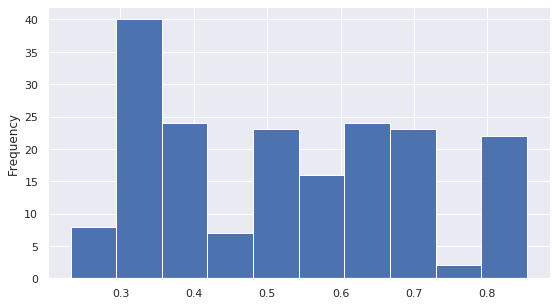

In [0]:
plt.figure(figsize = (9, 5)) 
data1['Tukar Rupiah'].plot(kind ="hist")

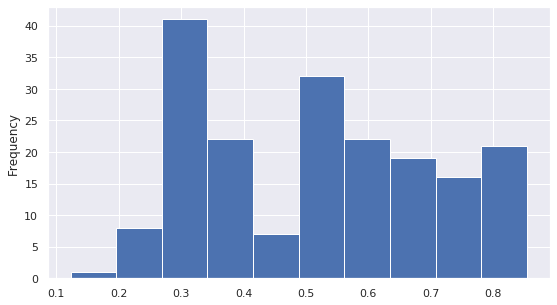

In [0]:
plt.figure(figsize = (9, 5)) 
data1['Standar Hidup'].plot(kind ="hist")

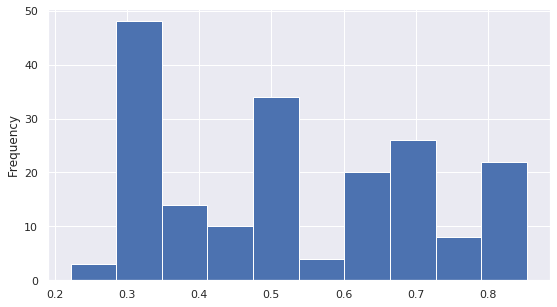

In [0]:
plt.figure(figsize = (9, 5)) 
data1['Pengangguran'].plot(kind ="hist")

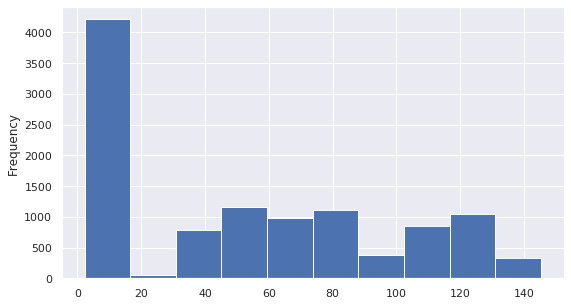

In [0]:
plt.figure(figsize = (9, 5)) 
data2['Open'].plot(kind ="hist")

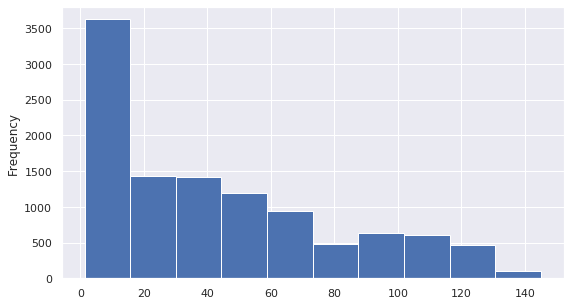

In [0]:
plt.figure(figsize = (9, 5)) 
data2['Adj Close'].plot(kind ="hist")

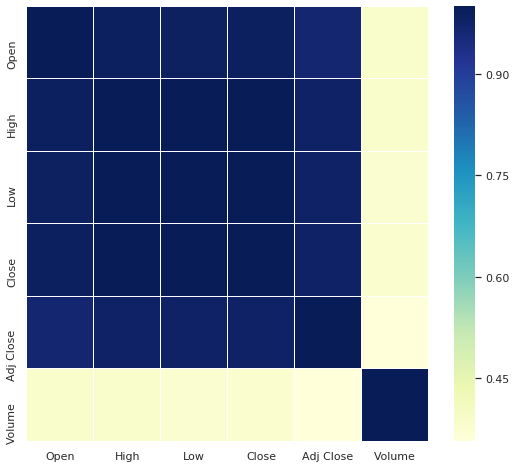

In [0]:
#Korelasi Matrix
corrmat = data2.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

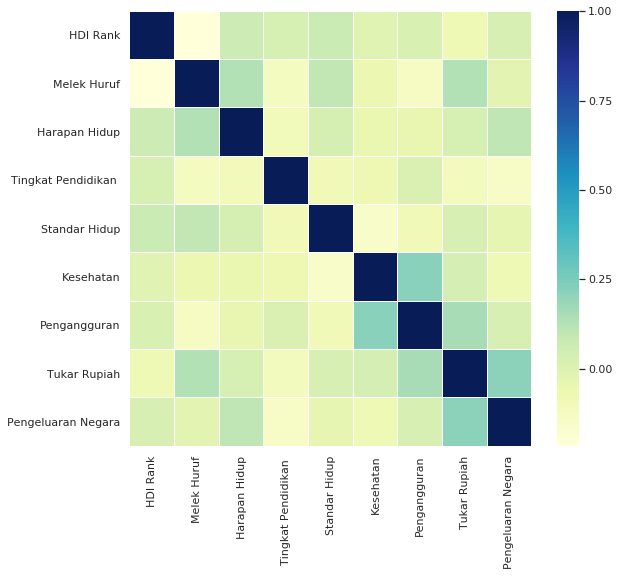

In [0]:
#Korelasi Matrix
corrmat = data1.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

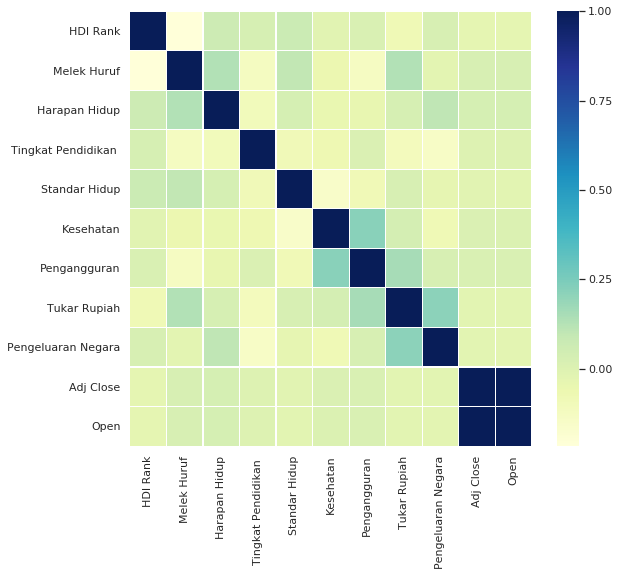

In [0]:
#Korelasi Matrix
corrmat = data3.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

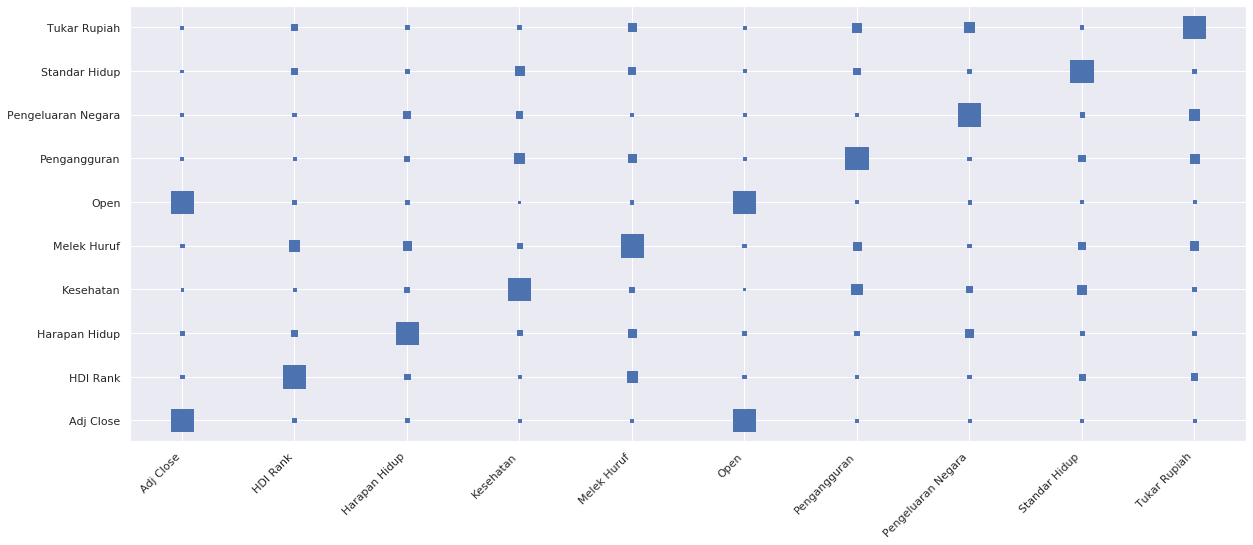

In [0]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
columns = ['HDI Rank', 'Melek Huruf', 'Harapan Hidup','Standar Hidup','Kesehatan','Pengangguran','Tukar Rupiah','Pengeluaran Negara','Adj Close','Open'] 
corr = data3[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

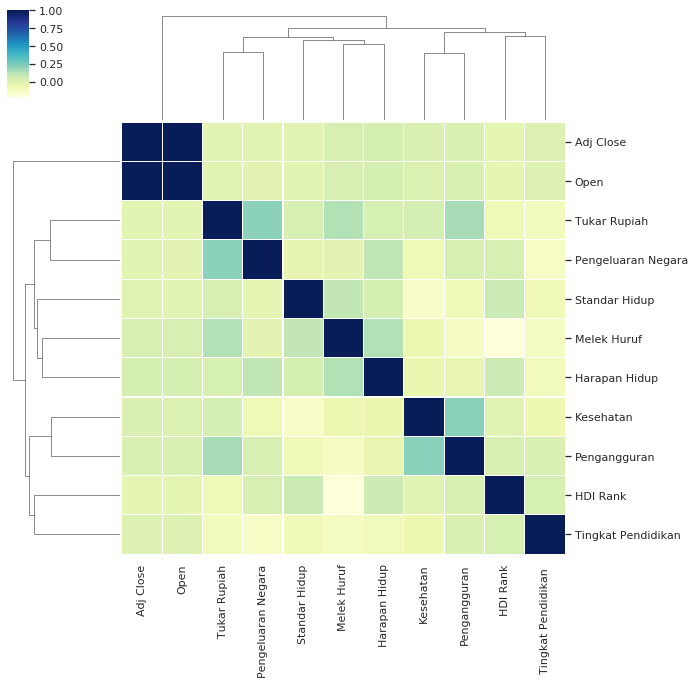

In [0]:
#Grid Korelasi Matrix
corrmat = data3.corr() 
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

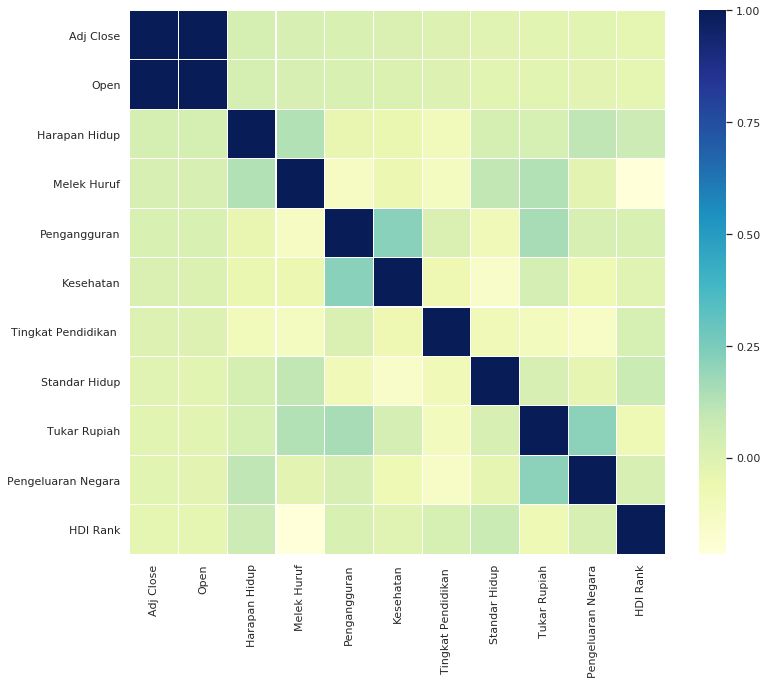

In [0]:
# adj close correlation matrix 
# k : number of variables for heatmap 
k = 13
  
cols = corrmat.nlargest(k, 'Adj Close')['Adj Close'].index 
  
cm = np.corrcoef(data3[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values)

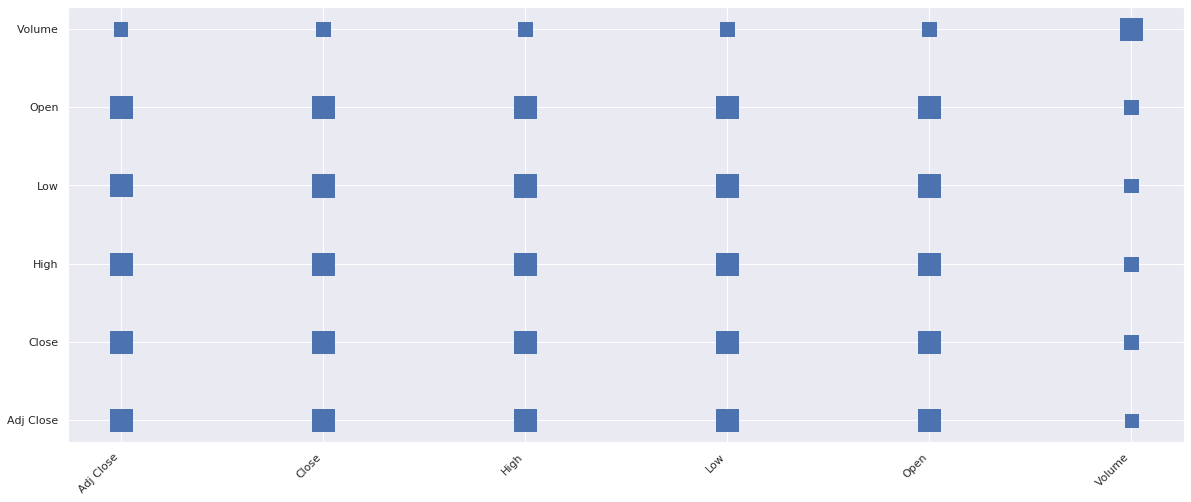

In [0]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
columns = ['Open', 'Low', 'High', 'Close', 'Adj Close', 'Volume'] 
corr = data2[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

In [0]:
data1['Tahun IPM'] = pd.to_datetime(data1['Tahun IPM'])
print(data1)

     HDI Rank  ... Pengeluaran Negara
0         168  ...              0.426
1          68  ...              0.854
2          85  ...              0.299
3          35  ...              0.299
4         147  ...              0.713
..        ...  ...                ...
184        78  ...              0.500
185       116  ...              0.669
186       178  ...              0.644
187       144  ...              0.759
188       156  ...              0.721

[189 rows x 11 columns]


In [0]:
data2['Date'] = pd.to_datetime(data2['Date'])
print(data2)

            Date        Open        High  ...       Close   Adj Close  Volume
0     1976-08-18    2.562200    2.562200  ...    2.562200    1.490914   19500
1     1976-08-19    2.549578    2.549578  ...    2.549578    1.483570     500
2     1976-08-20    2.536956    2.536956  ...    2.536956    1.476225    8000
3     1976-08-23    2.461226    2.461226  ...    2.461226    1.432159    1000
4     1976-08-24    2.435982    2.435982  ...    2.435982    1.417470    7500
...          ...         ...         ...  ...         ...         ...     ...
10914 2019-11-26  141.979996  142.000000  ...  141.970001  141.970001   86400
10915 2019-11-27  141.490005  141.860001  ...  141.660004  141.660004  179900
10916 2019-11-29  140.149994  140.580002  ...  140.210007  140.210007  107800
10917 2019-12-02  141.350006  141.350006  ...  140.270004  140.270004  117800
10918 2019-12-03  140.509995  140.789993  ...  140.729996  140.729996  109300

[10919 rows x 7 columns]


In [0]:
data1 = data1.set_index('Tahun IPM')

In [0]:
sns.set(rc={'figure.figsize':(20, 8)})

In [0]:
standar_hidup = data1['Standar Hidup']

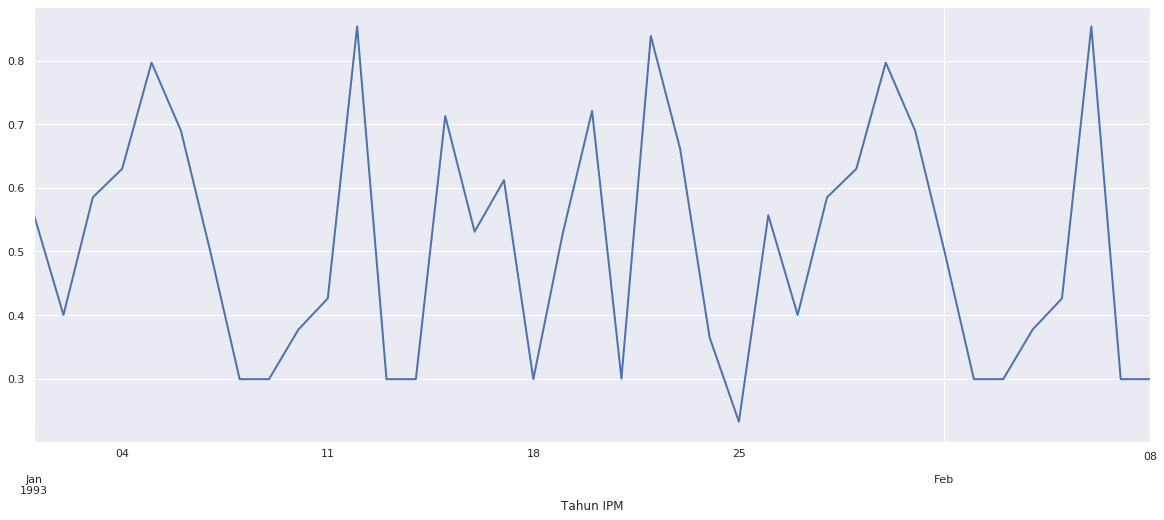

In [0]:
data1.loc['1993', 'Standar Hidup'].plot(linewidth=2);

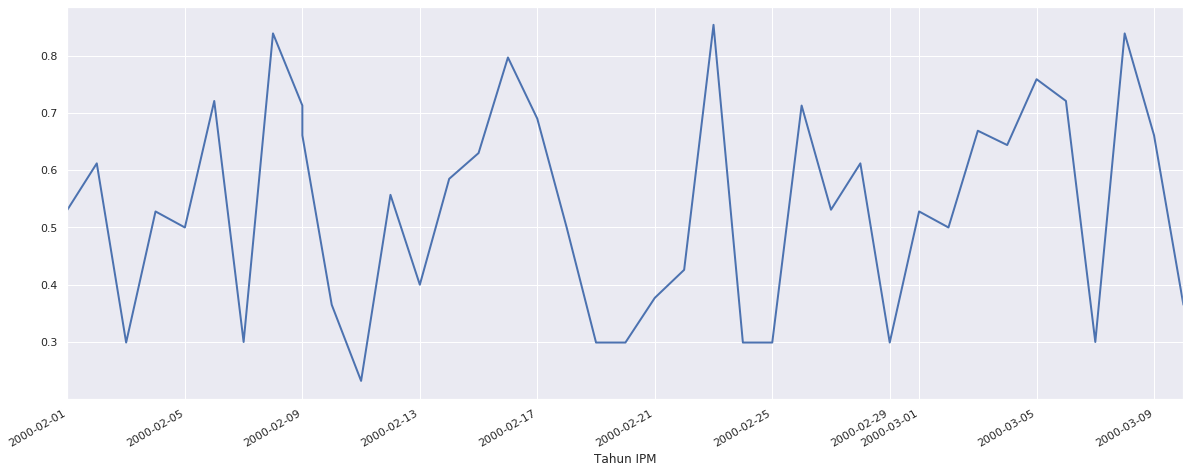

In [0]:
data1.loc['2000', 'Standar Hidup'].plot(linewidth=2);

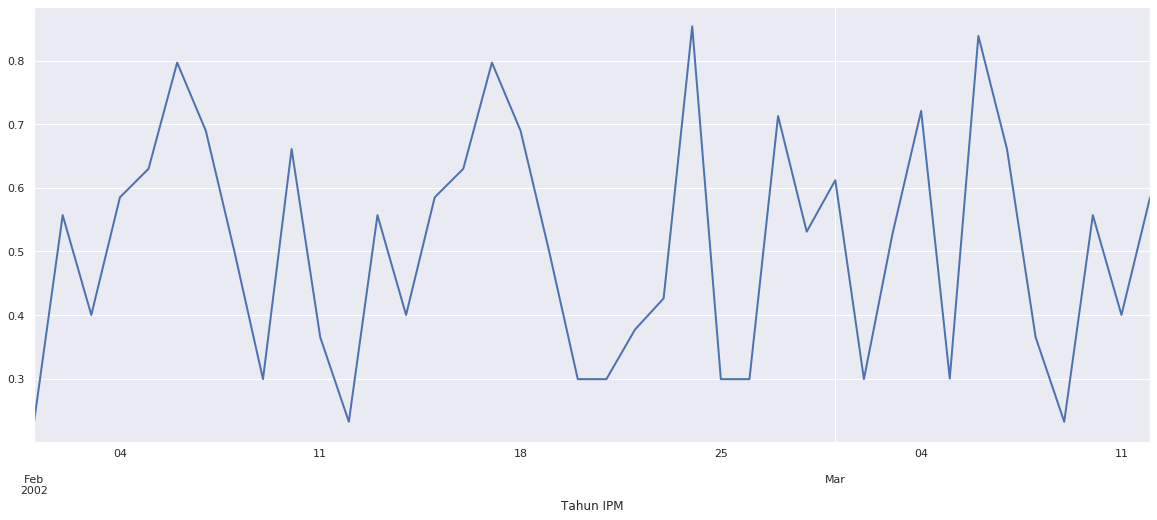

In [0]:
data1.loc['2002', 'Standar Hidup'].plot(linewidth=2);

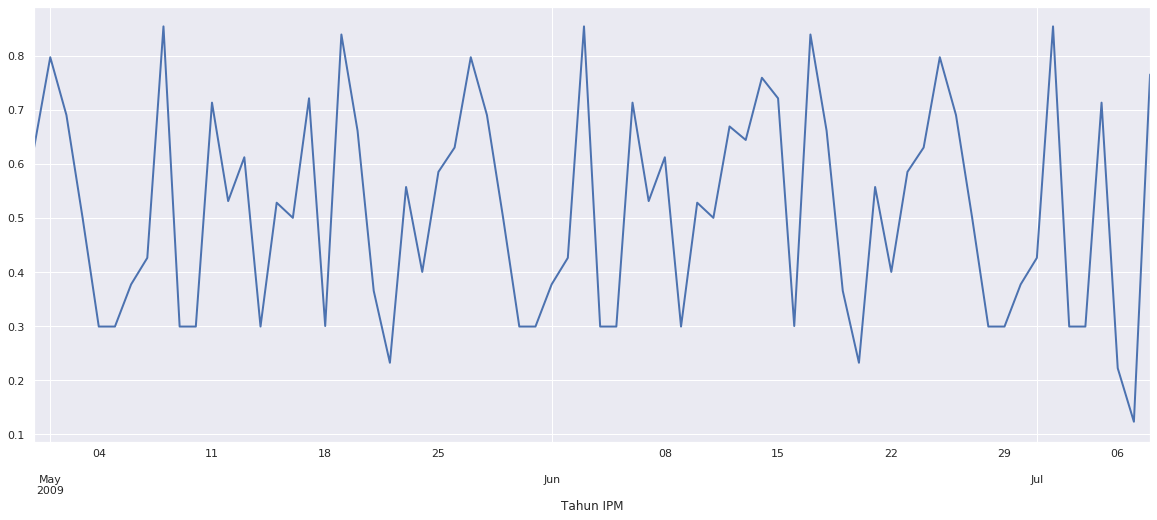

In [0]:
data1.loc['2009', 'Standar Hidup'].plot(linewidth=2);

In [0]:
data2 = data2.set_index('Date')

In [0]:
sns.set(rc={'figure.figsize':(20, 8)})

In [0]:
adj_close = data2['Adj Close']

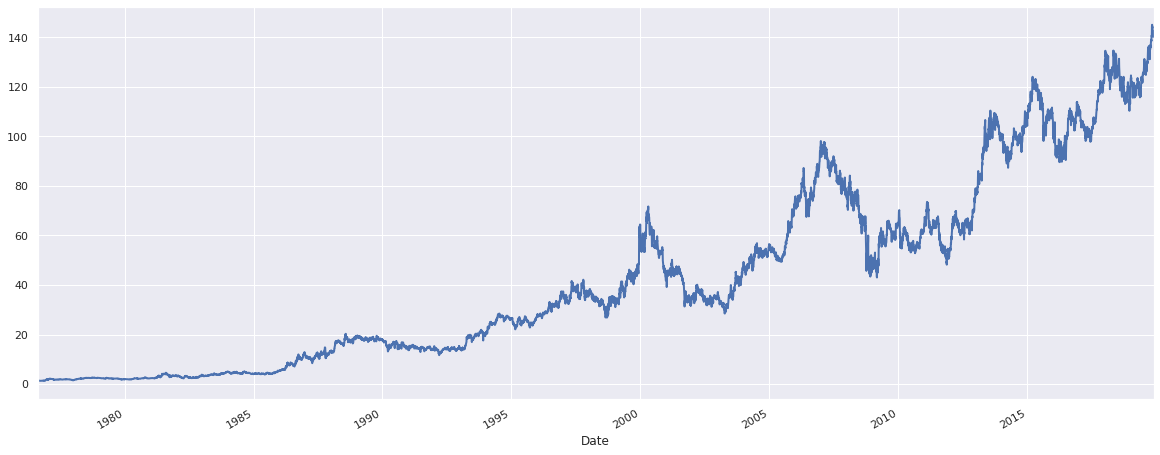

In [0]:
data2.loc['1976': '2019', 'Adj Close'].plot(linewidth=2);

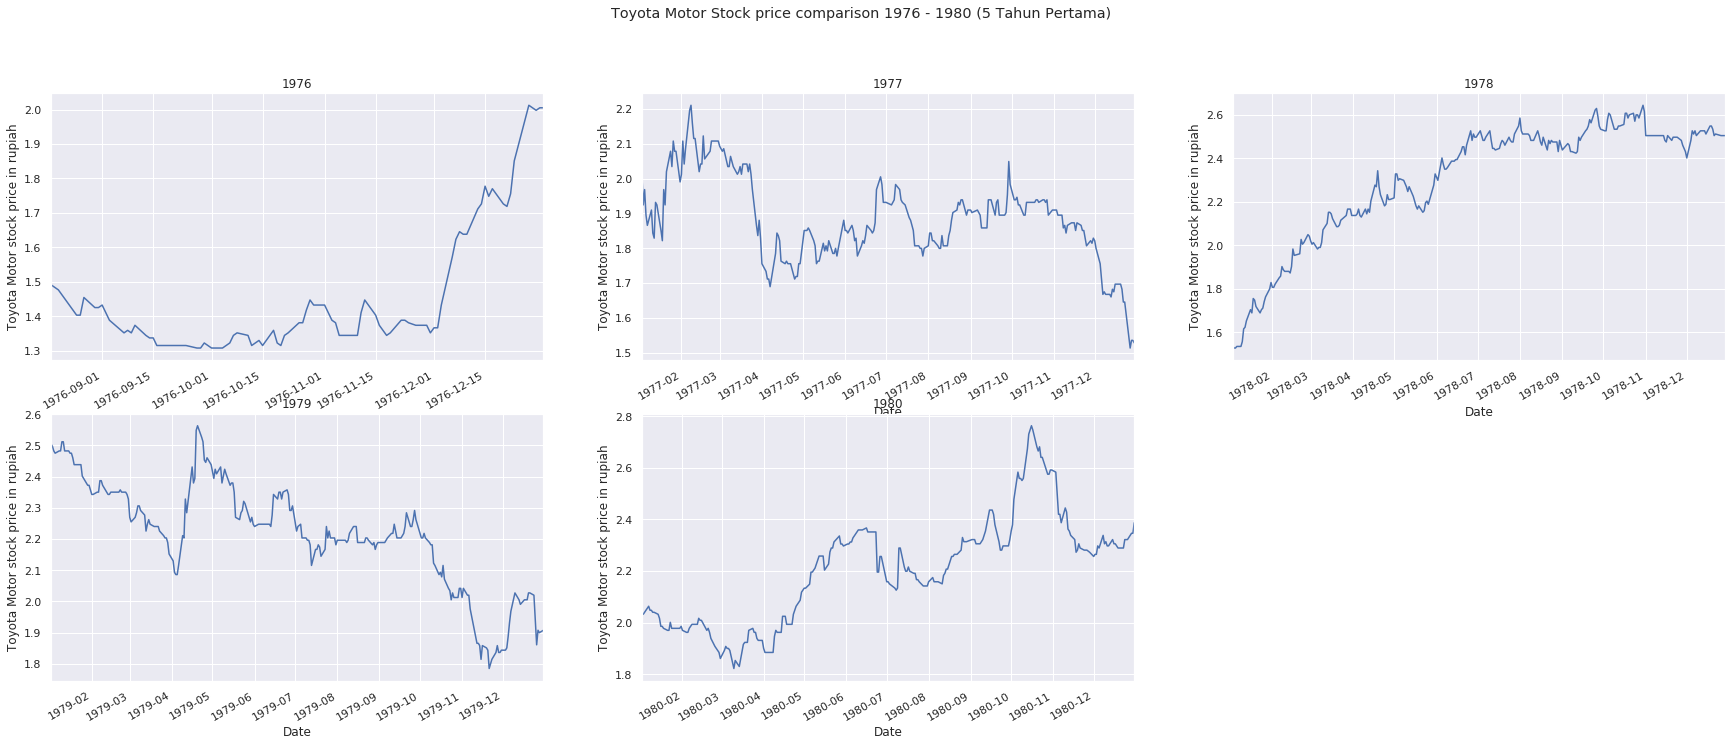

In [0]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Toyota Motor Stock price comparison 1976 - 1980 (5 Tahun Pertama)')

ax1 = fig.add_subplot(231)
ax1.set_title('1976')
ax1 = data2.loc['1976', 'Adj Close'].plot()
ax1.set_ylabel('Toyota Motor stock price in rupiah');

ax2 = fig.add_subplot(232)
ax2.set_title('1977')
ax2 = data2.loc['1977', 'Adj Close'].plot()
ax2.set_ylabel('Toyota Motor stock price in rupiah');

ax3 = fig.add_subplot(233)
ax3.set_title('1978')
ax3 = data2.loc['1978', 'Adj Close'].plot()
ax3.set_ylabel('Toyota Motor stock price in rupiah');

ax4 = fig.add_subplot(234)
ax4.set_title('1979')
ax4 = data2.loc['1979', 'Adj Close'].plot()
ax4.set_ylabel('Toyota Motor stock price in rupiah');

ax5 = fig.add_subplot(235)
ax5.set_title('1980')
ax5 = data2.loc['1980', 'Adj Close'].plot()
ax5.set_ylabel('Toyota Motor stock price in rupiah');

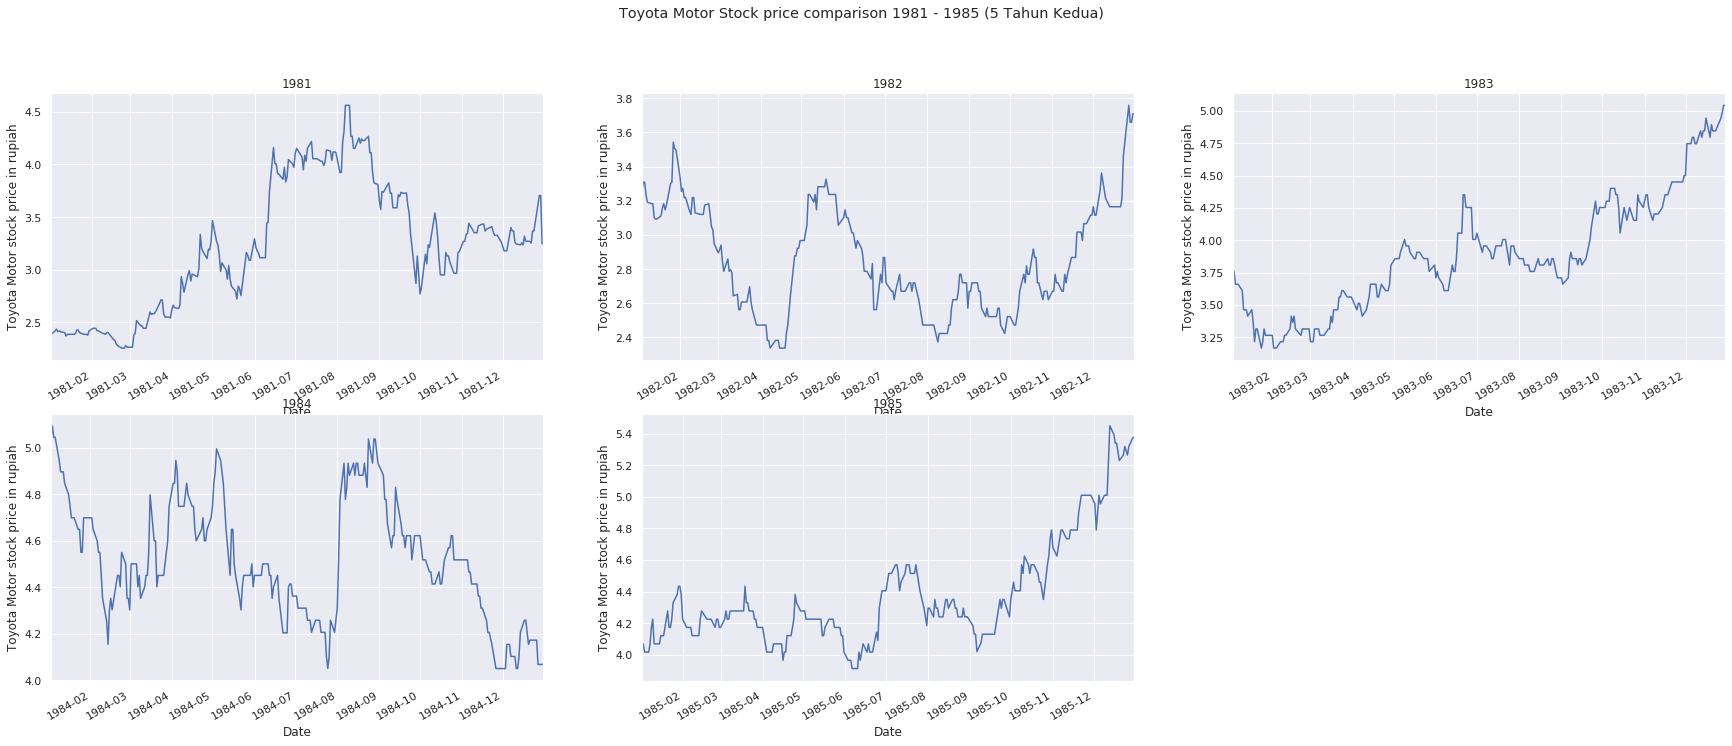

In [0]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Toyota Motor Stock price comparison 1981 - 1985 (5 Tahun Kedua)')

ax6 = fig.add_subplot(231)
ax6.set_title('1981')
ax6 = data2.loc['1981', 'Adj Close'].plot()
ax6.set_ylabel('Toyota Motor stock price in rupiah');

ax7 = fig.add_subplot(232)
ax7.set_title('1982')
ax7 = data2.loc['1982', 'Adj Close'].plot()
ax7.set_ylabel('Toyota Motor stock price in rupiah');

ax8 = fig.add_subplot(233)
ax8.set_title('1983')
ax8 = data2.loc['1983', 'Adj Close'].plot()
ax8.set_ylabel('Toyota Motor stock price in rupiah');

ax9 = fig.add_subplot(234)
ax9.set_title('1984')
ax9 = data2.loc['1984', 'Adj Close'].plot()
ax9.set_ylabel('Toyota Motor stock price in rupiah');

ax10 = fig.add_subplot(235)
ax10.set_title('1985')
ax10 = data2.loc['1985', 'Adj Close'].plot()
ax10.set_ylabel('Toyota Motor stock price in rupiah');


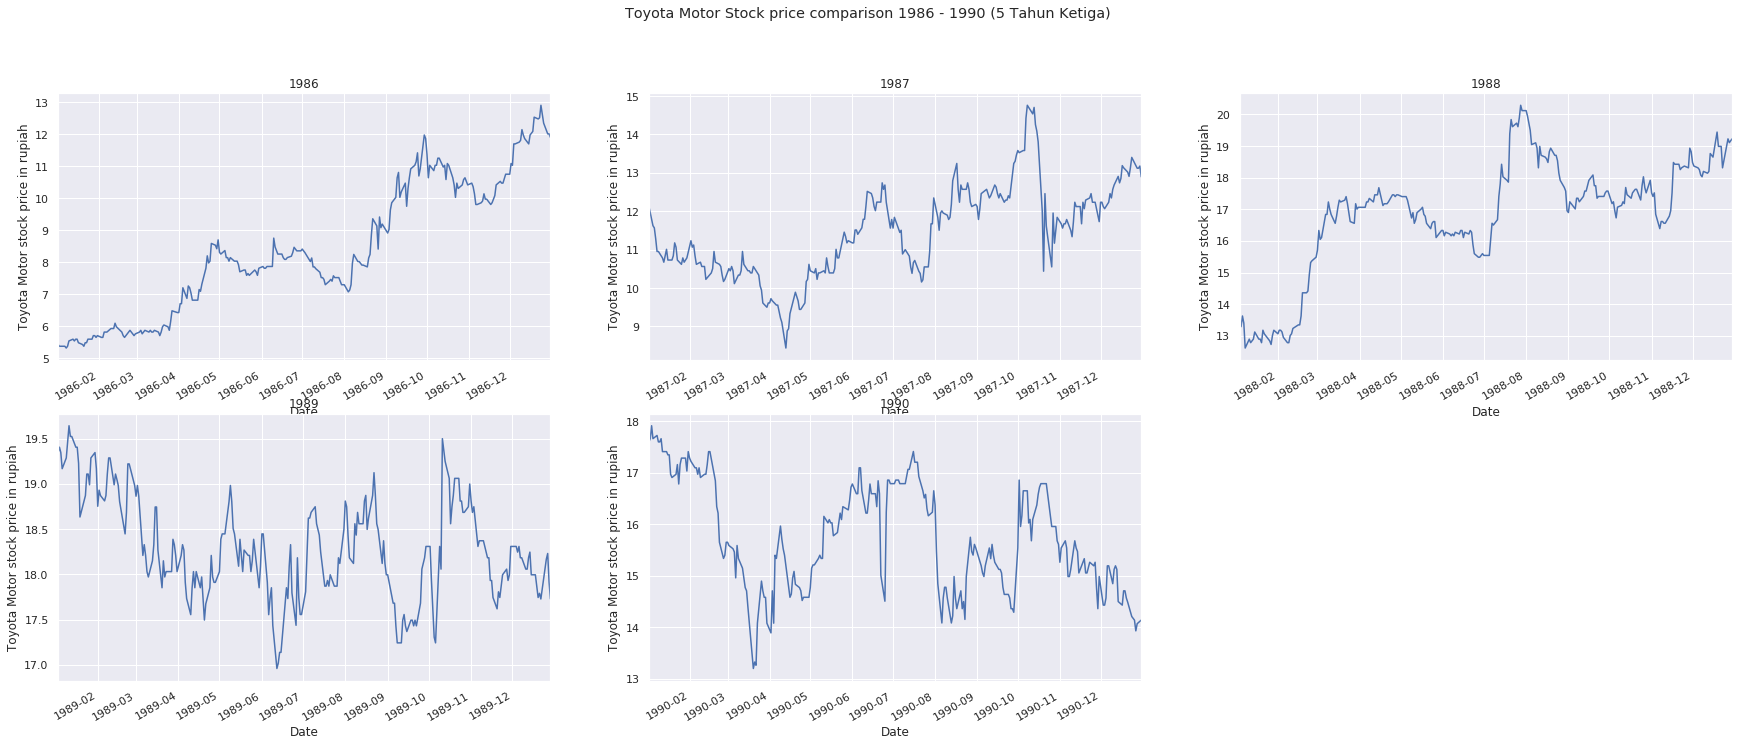

In [0]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Toyota Motor Stock price comparison 1986 - 1990 (5 Tahun Ketiga)')

ax11 = fig.add_subplot(231)
ax11.set_title('1986')
ax11 = data2.loc['1986', 'Adj Close'].plot()
ax11.set_ylabel('Toyota Motor stock price in rupiah');

ax12 = fig.add_subplot(232)
ax12.set_title('1987')
ax12 = data2.loc['1987', 'Adj Close'].plot()
ax12.set_ylabel('Toyota Motor stock price in rupiah');

ax13 = fig.add_subplot(233)
ax13.set_title('1988')
ax13 = data2.loc['1988', 'Adj Close'].plot()
ax13.set_ylabel('Toyota Motor stock price in rupiah');

ax14 = fig.add_subplot(234)
ax14.set_title('1989')
ax14 = data2.loc['1989', 'Adj Close'].plot()
ax14.set_ylabel('Toyota Motor stock price in rupiah');

ax15 = fig.add_subplot(235)
ax15.set_title('1990')
ax15 = data2.loc['1990', 'Adj Close'].plot()
ax15.set_ylabel('Toyota Motor stock price in rupiah');


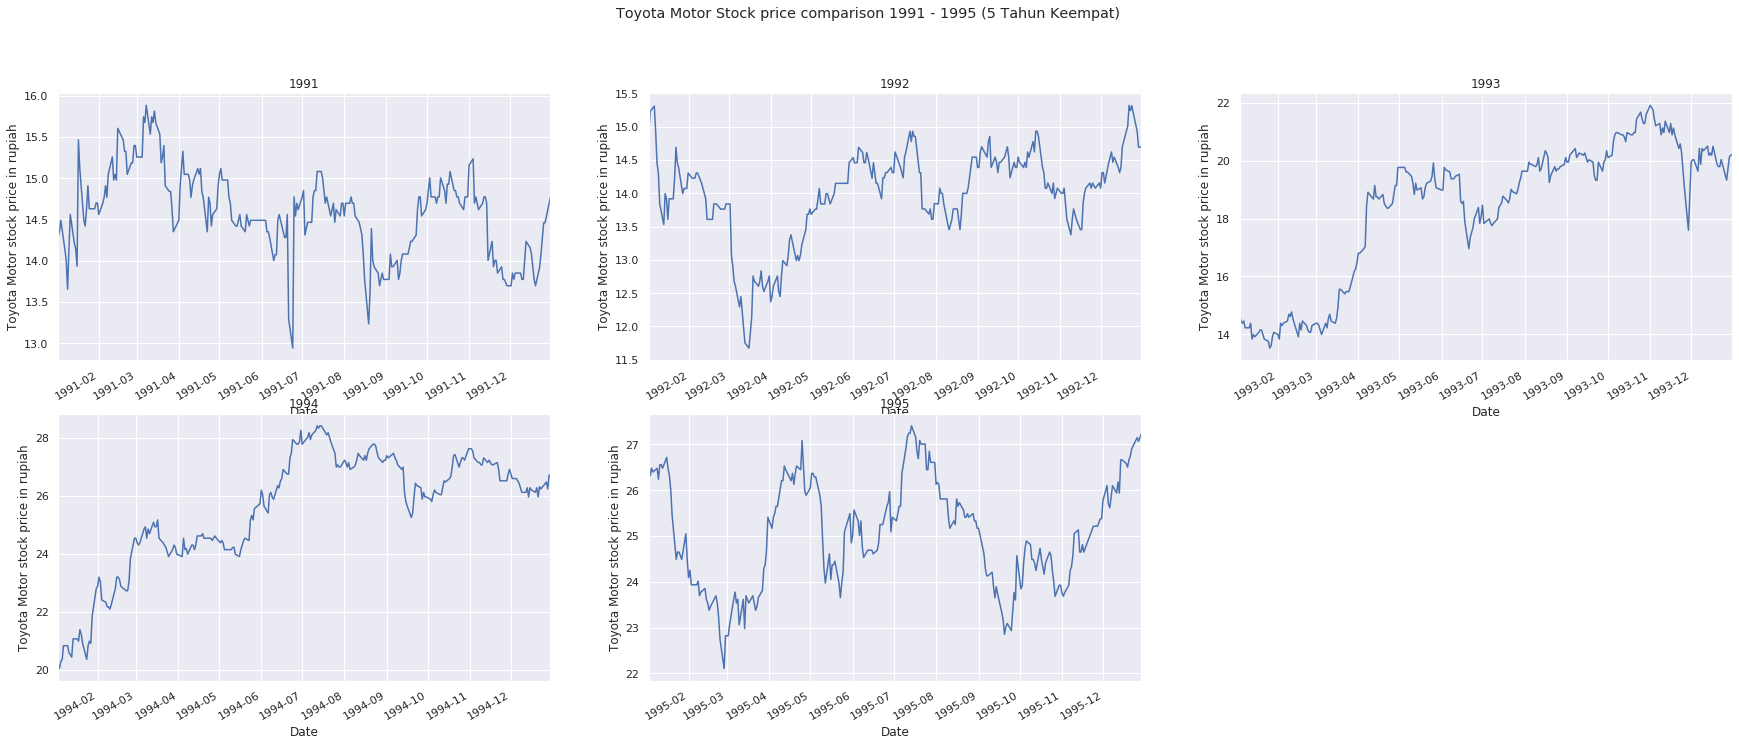

In [0]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Toyota Motor Stock price comparison 1991 - 1995 (5 Tahun Keempat)')

ax16 = fig.add_subplot(231)
ax16.set_title('1991')
ax16 = data2.loc['1991', 'Adj Close'].plot()
ax16.set_ylabel('Toyota Motor stock price in rupiah');

ax17 = fig.add_subplot(232)
ax17.set_title('1992')
ax17 = data2.loc['1992', 'Adj Close'].plot()
ax17.set_ylabel('Toyota Motor stock price in rupiah');

ax18 = fig.add_subplot(233)
ax18.set_title('1993')
ax18 = data2.loc['1993', 'Adj Close'].plot()
ax18.set_ylabel('Toyota Motor stock price in rupiah');

ax19 = fig.add_subplot(234)
ax19.set_title('1994')
ax19 = data2.loc['1994', 'Adj Close'].plot()
ax19.set_ylabel('Toyota Motor stock price in rupiah');

ax20 = fig.add_subplot(235)
ax20.set_title('1995')
ax20 = data2.loc['1995', 'Adj Close'].plot()
ax20.set_ylabel('Toyota Motor stock price in rupiah');

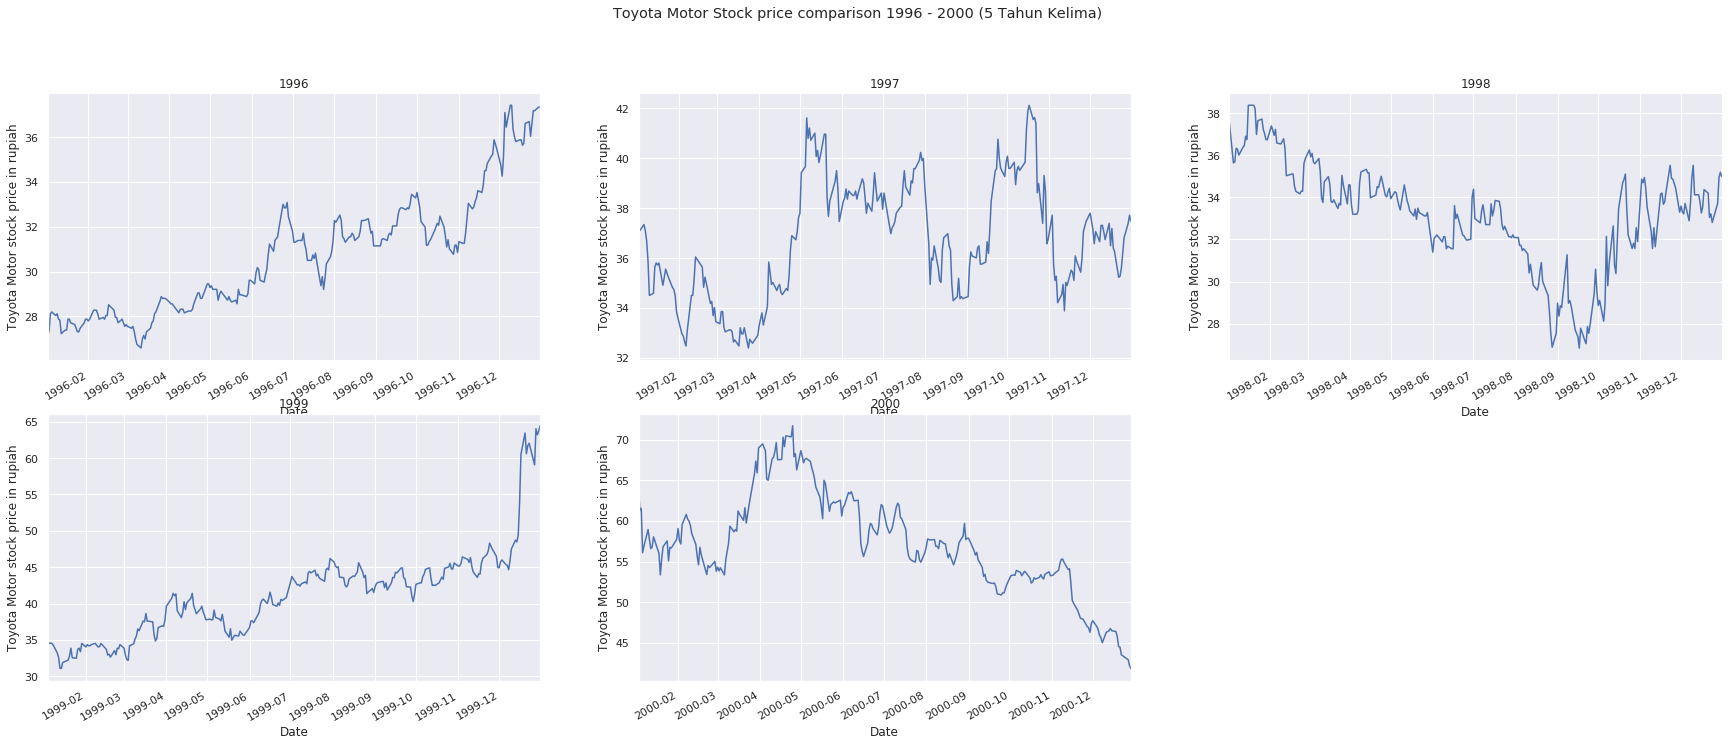

In [0]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Toyota Motor Stock price comparison 1996 - 2000 (5 Tahun Kelima)')

ax21 = fig.add_subplot(231)
ax21.set_title('1996')
ax21 = data2.loc['1996', 'Adj Close'].plot()
ax21.set_ylabel('Toyota Motor stock price in rupiah');

ax22 = fig.add_subplot(232)
ax22.set_title('1997')
ax22 = data2.loc['1997', 'Adj Close'].plot()
ax22.set_ylabel('Toyota Motor stock price in rupiah');

ax23 = fig.add_subplot(233)
ax23.set_title('1998')
ax23 = data2.loc['1998', 'Adj Close'].plot()
ax23.set_ylabel('Toyota Motor stock price in rupiah');

ax24 = fig.add_subplot(234)
ax24.set_title('1999')
ax24 = data2.loc['1999', 'Adj Close'].plot()
ax24.set_ylabel('Toyota Motor stock price in rupiah');

ax25 = fig.add_subplot(235)
ax25.set_title('2000')
ax25 = data2.loc['2000', 'Adj Close'].plot()
ax25.set_ylabel('Toyota Motor stock price in rupiah');

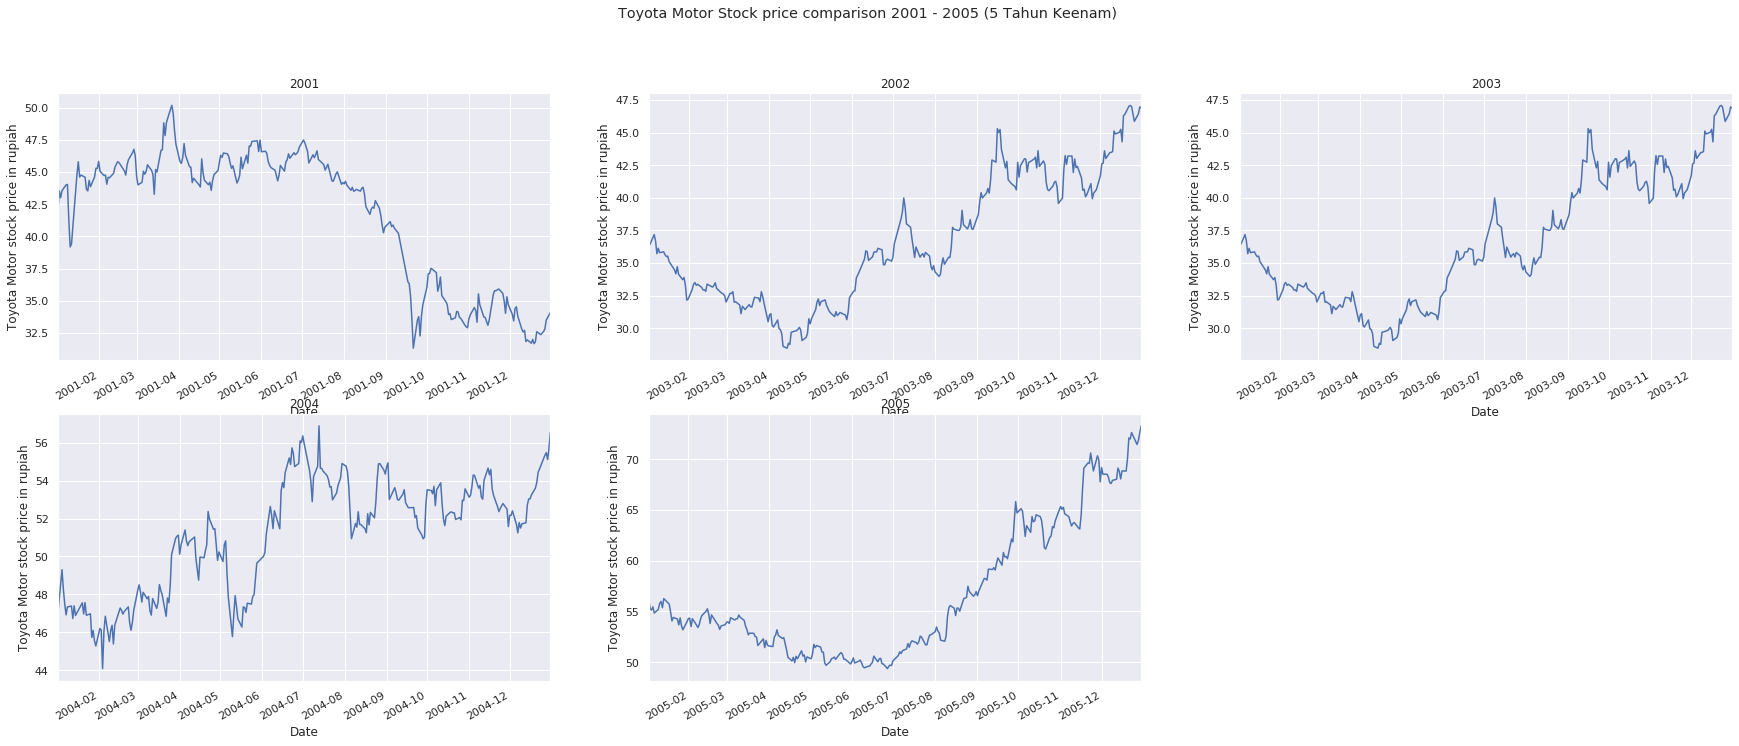

In [0]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Toyota Motor Stock price comparison 2001 - 2005 (5 Tahun Keenam)')

ax26 = fig.add_subplot(231)
ax26.set_title('2001')
ax26 = data2.loc['2001', 'Adj Close'].plot()
ax26.set_ylabel('Toyota Motor stock price in rupiah');

ax26 = fig.add_subplot(232)
ax26.set_title('2002')
ax26 = data2.loc['2003', 'Adj Close'].plot()
ax26.set_ylabel('Toyota Motor stock price in rupiah');

ax27 = fig.add_subplot(233)
ax27.set_title('2003')
ax27 = data2.loc['2003', 'Adj Close'].plot()
ax27.set_ylabel('Toyota Motor stock price in rupiah');

ax28 = fig.add_subplot(234)
ax28.set_title('2004')
ax28 = data2.loc['2004', 'Adj Close'].plot()
ax28.set_ylabel('Toyota Motor stock price in rupiah');

ax29 = fig.add_subplot(235)
ax29.set_title('2005')
ax29 = data2.loc['2005', 'Adj Close'].plot()
ax29.set_ylabel('Toyota Motor stock price in rupiah');

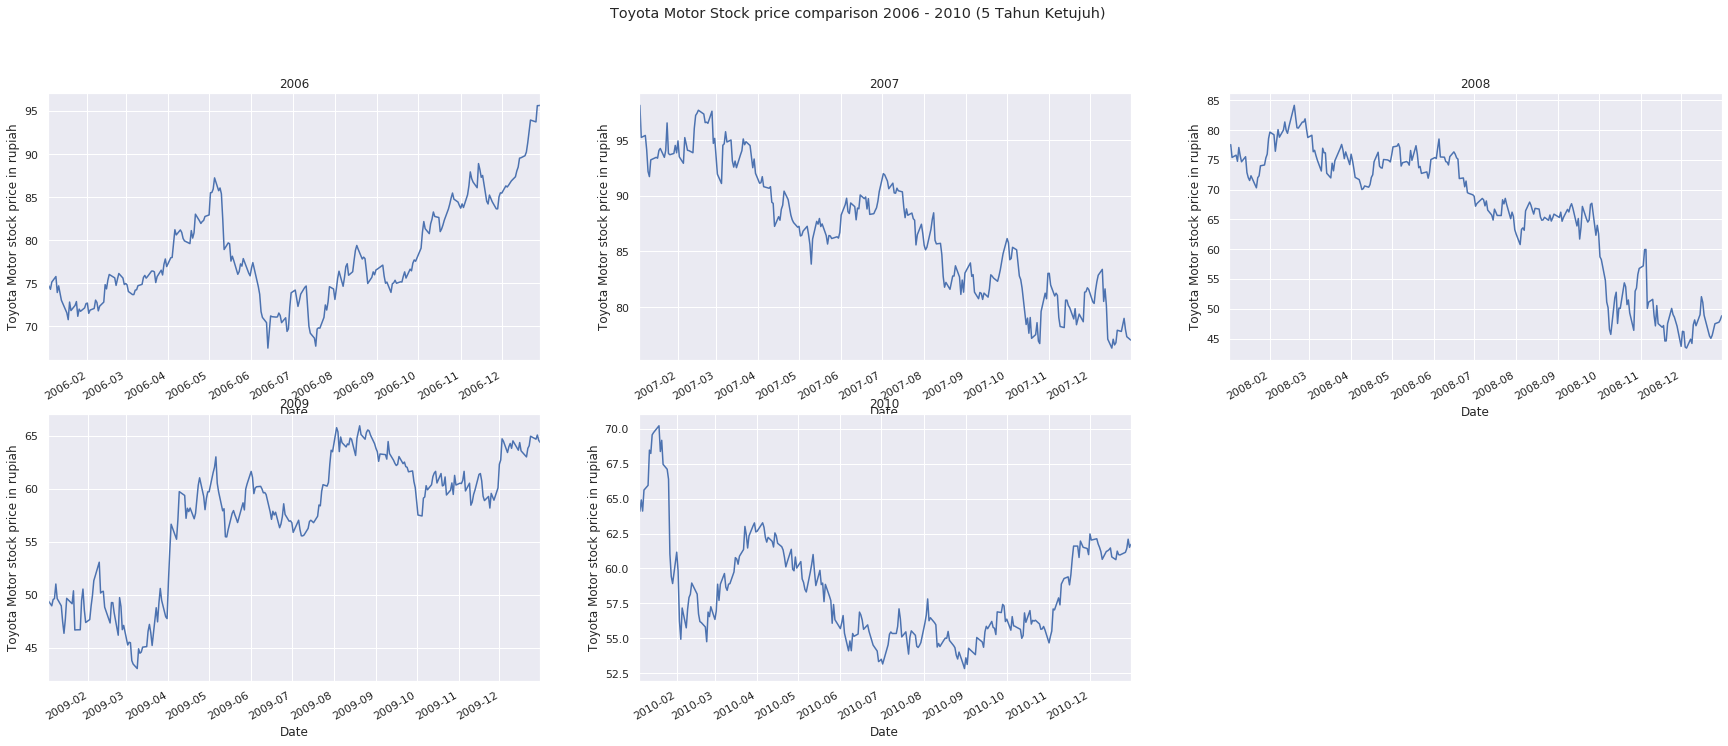

In [0]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Toyota Motor Stock price comparison 2006 - 2010 (5 Tahun Ketujuh)')

ax30 = fig.add_subplot(231)
ax30.set_title('2006')
ax30 = data2.loc['2006', 'Adj Close'].plot()
ax30.set_ylabel('Toyota Motor stock price in rupiah');

ax31 = fig.add_subplot(232)
ax31.set_title('2007')
ax31 = data2.loc['2007', 'Adj Close'].plot()
ax31.set_ylabel('Toyota Motor stock price in rupiah');

ax32 = fig.add_subplot(233)
ax32.set_title('2008')
ax32 = data2.loc['2008', 'Adj Close'].plot()
ax32.set_ylabel('Toyota Motor stock price in rupiah');

ax33 = fig.add_subplot(234)
ax33.set_title('2009')
ax33 = data2.loc['2009', 'Adj Close'].plot()
ax33.set_ylabel('Toyota Motor stock price in rupiah');

ax34 = fig.add_subplot(235)
ax34.set_title('2010')
ax34 = data2.loc['2010', 'Adj Close'].plot()
ax34.set_ylabel('Toyota Motor stock price in rupiah');

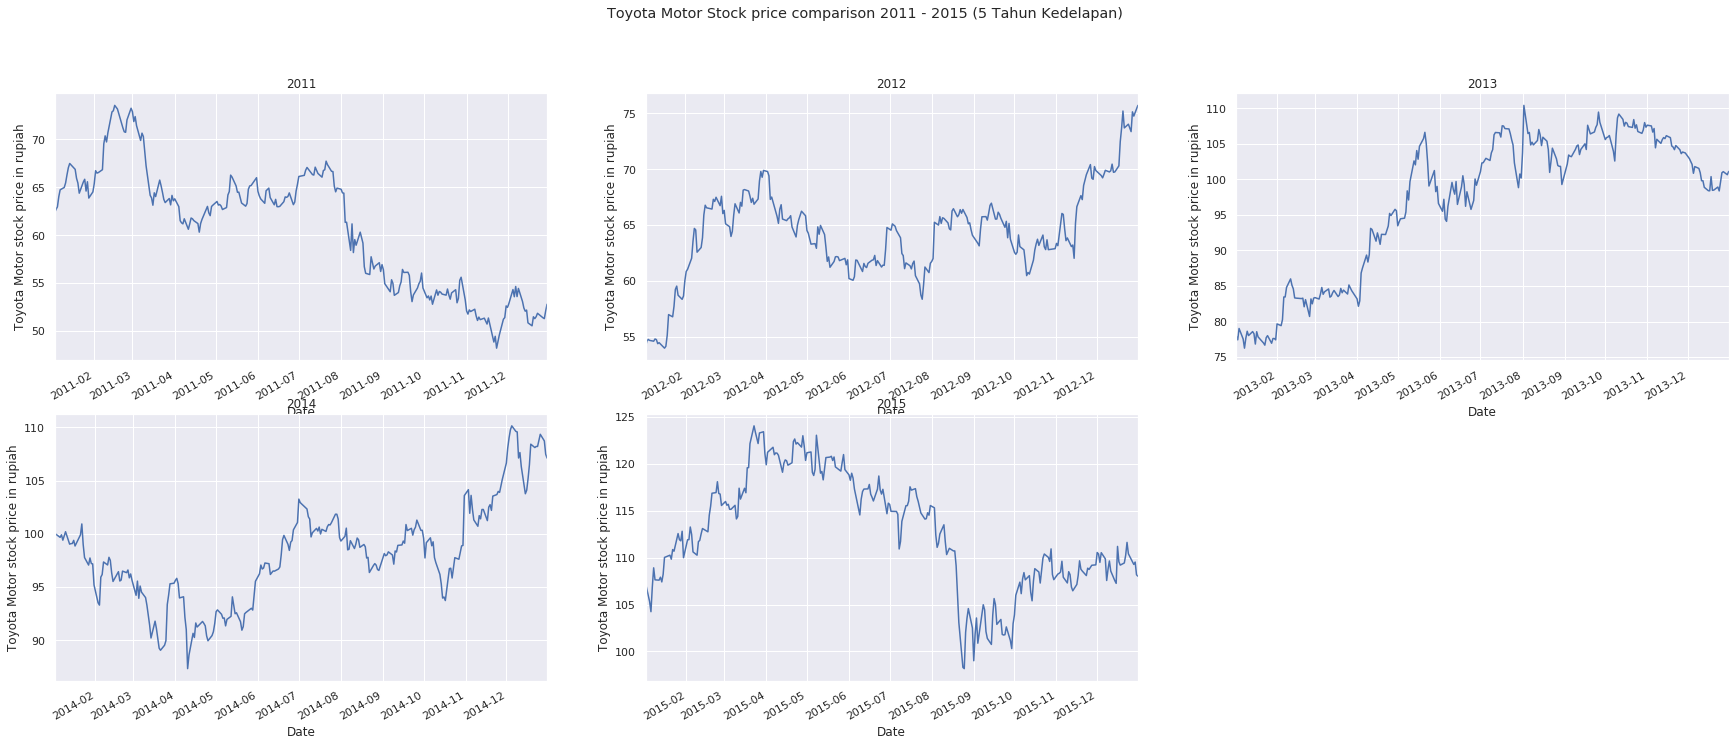

In [0]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Toyota Motor Stock price comparison 2011 - 2015 (5 Tahun Kedelapan)')

ax35 = fig.add_subplot(231)
ax35.set_title('2011')
ax35 = data2.loc['2011', 'Adj Close'].plot()
ax35.set_ylabel('Toyota Motor stock price in rupiah');

ax36 = fig.add_subplot(232)
ax36.set_title('2012')
ax36 = data2.loc['2012', 'Adj Close'].plot()
ax36.set_ylabel('Toyota Motor stock price in rupiah');

ax37 = fig.add_subplot(233)
ax37.set_title('2013')
ax37 = data2.loc['2013', 'Adj Close'].plot()
ax37.set_ylabel('Toyota Motor stock price in rupiah');

ax38 = fig.add_subplot(234)
ax38.set_title('2014')
ax38 = data2.loc['2014', 'Adj Close'].plot()
ax38.set_ylabel('Toyota Motor stock price in rupiah');

ax39 = fig.add_subplot(235)
ax39.set_title('2015')
ax39 = data2.loc['2015', 'Adj Close'].plot()
ax39.set_ylabel('Toyota Motor stock price in rupiah');

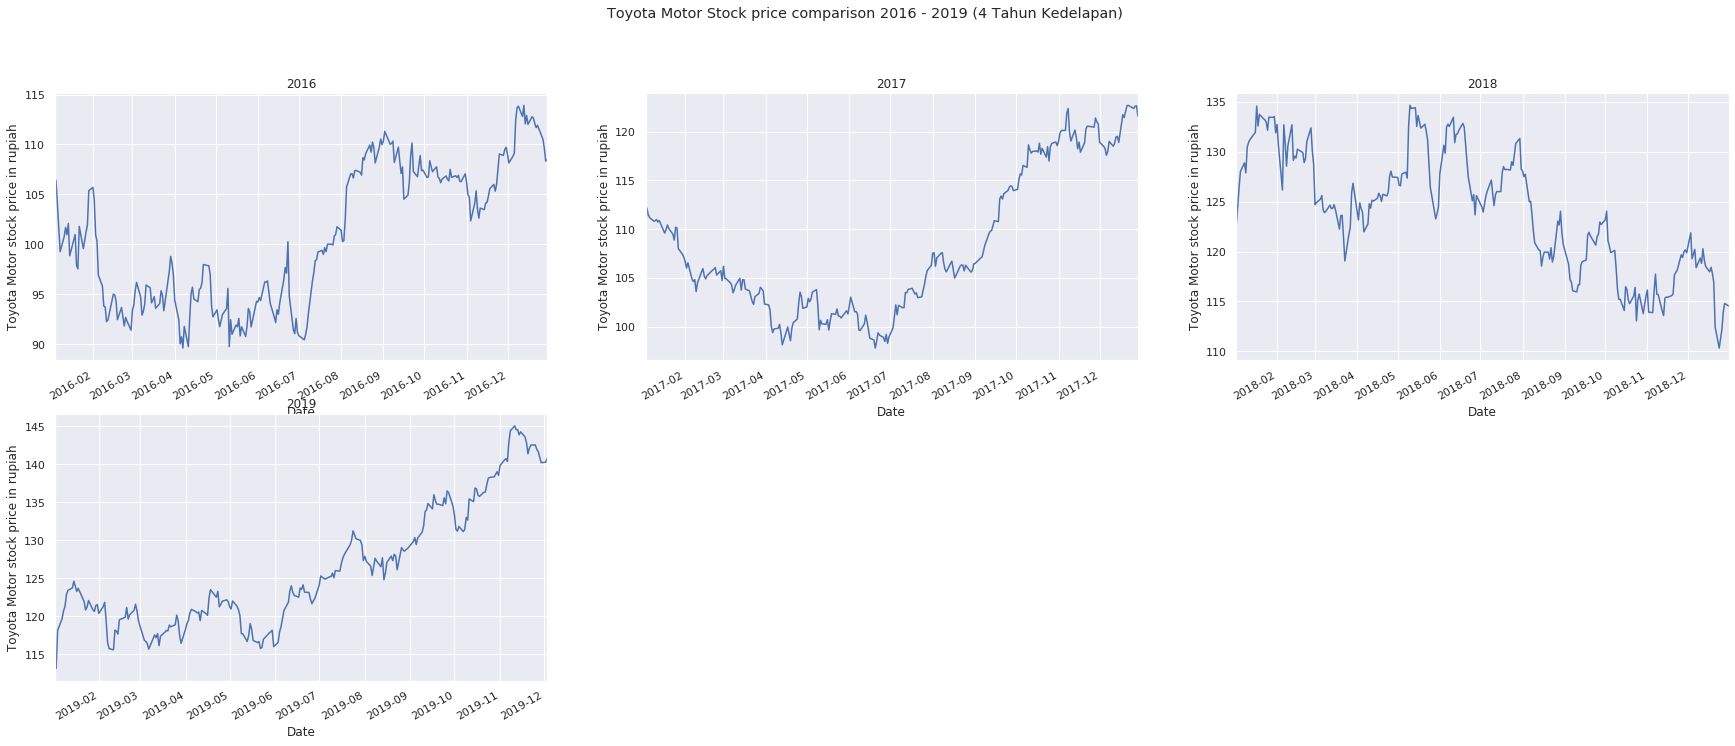

In [0]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Toyota Motor Stock price comparison 2016 - 2019 (4 Tahun Kedelapan)')

ax40 = fig.add_subplot(231)
ax40.set_title('2016')
ax40 = data2.loc['2016', 'Adj Close'].plot()
ax40.set_ylabel('Toyota Motor stock price in rupiah');

ax41 = fig.add_subplot(232)
ax41.set_title('2017')
ax41 = data2.loc['2017', 'Adj Close'].plot()
ax41.set_ylabel('Toyota Motor stock price in rupiah');

ax42 = fig.add_subplot(233)
ax42.set_title('2018')
ax42 = data2.loc['2018', 'Adj Close'].plot()
ax42.set_ylabel('Toyota Motor stock price in rupiah');

ax43 = fig.add_subplot(234)
ax43.set_title('2019')
ax43 = data2.loc['2019', 'Adj Close'].plot()
ax43.set_ylabel('Toyota Motor stock price in rupiah');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


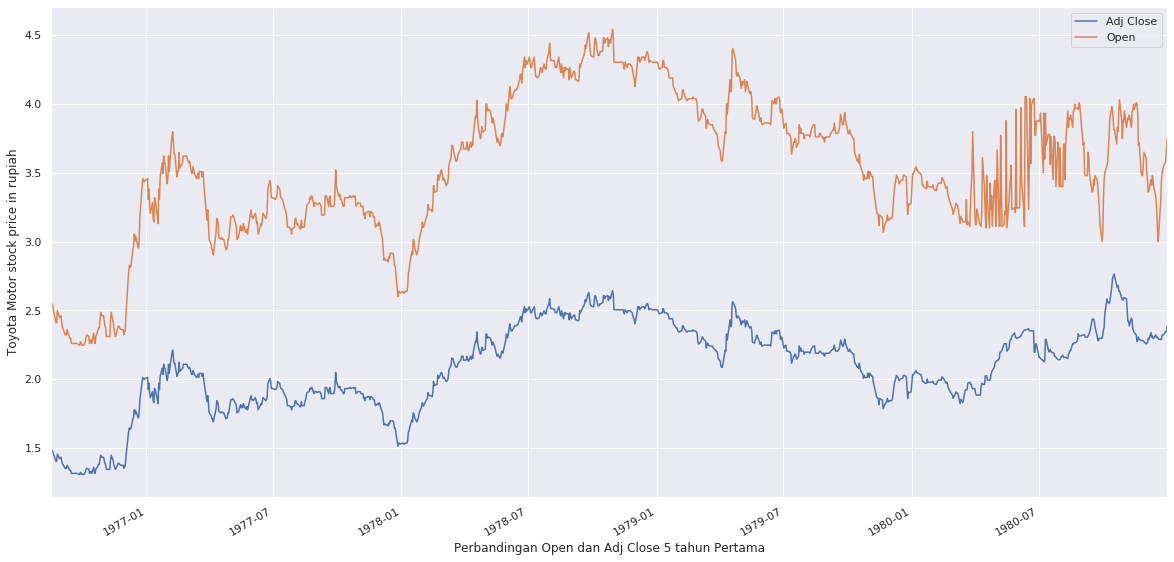

In [0]:
ax1 = fig.add_subplot(231)
ax1.set_title('1976')
ax1 = data2.loc['1976':'1980',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Toyota Motor stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 5 tahun Pertama');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


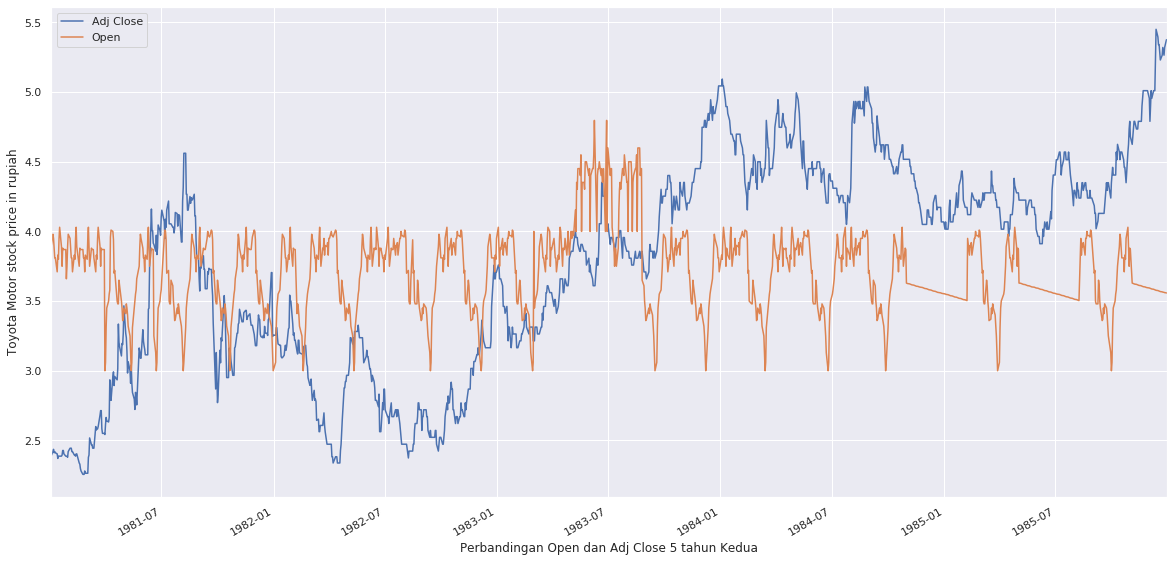

In [0]:
ax1 = fig.add_subplot(231)
ax1.set_title('1981')
ax1 = data2.loc['1981':'1985',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Toyota Motor stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 5 tahun Kedua');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


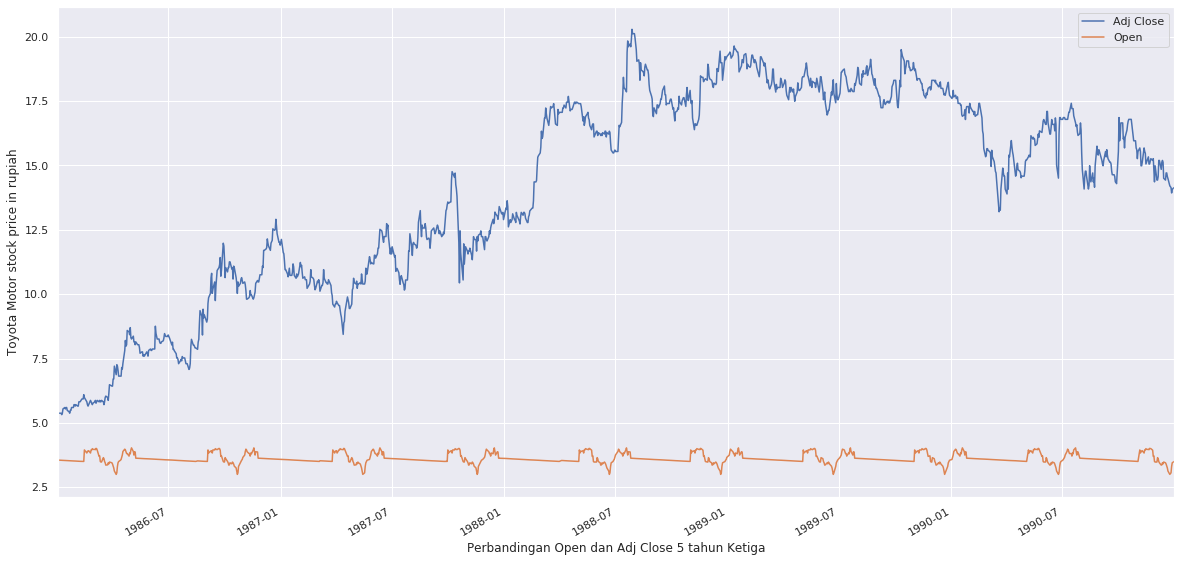

In [0]:
ax1 = fig.add_subplot(231)
ax1.set_title('1986')
ax1 = data2.loc['1986':'1990',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Toyota Motor stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 5 tahun Ketiga');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


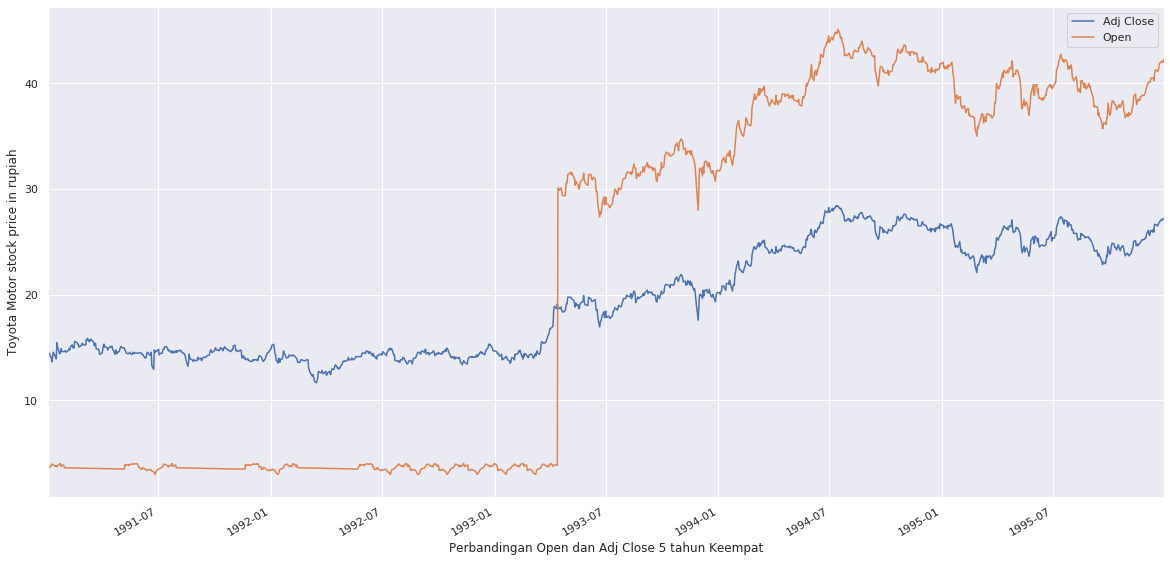

In [0]:
ax1 = fig.add_subplot(231)
ax1.set_title('1991')
ax1 = data2.loc['1991':'1995',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Toyota Motor stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 5 tahun Keempat');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


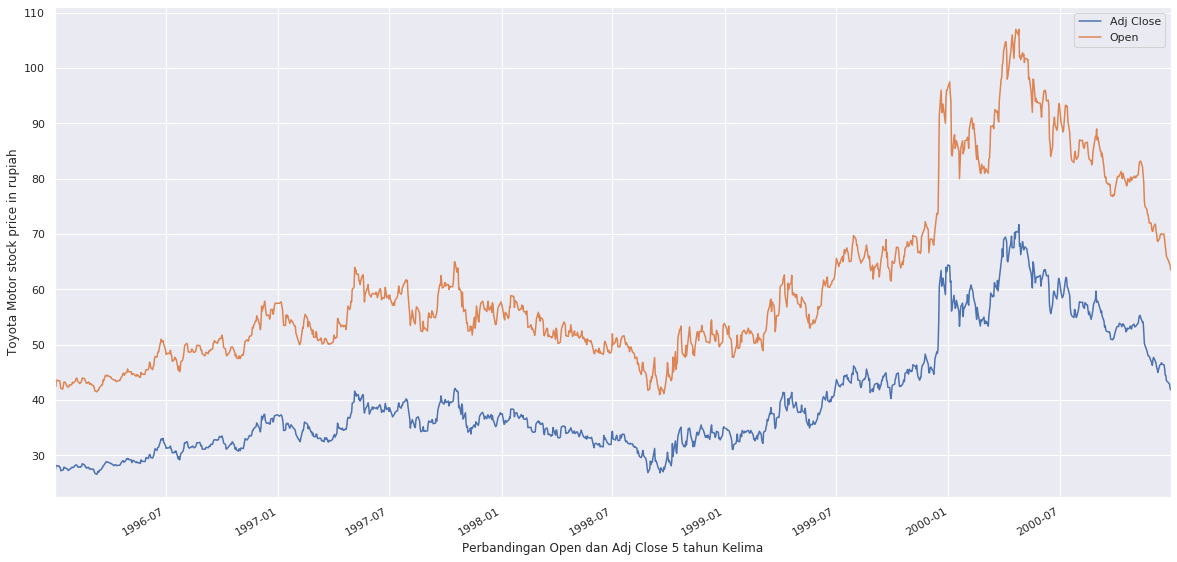

In [0]:
ax1 = fig.add_subplot(231)
ax1.set_title('1996')
ax1 = data2.loc['1996':'2000',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Toyota Motor stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 5 tahun Kelima');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


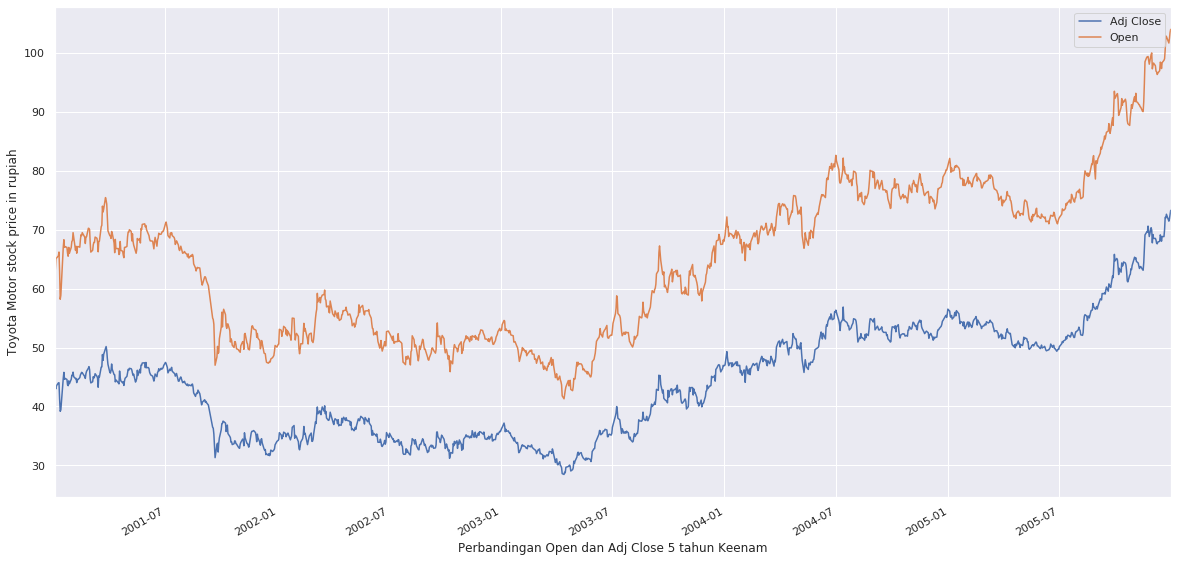

In [0]:
ax1 = fig.add_subplot(231)
ax1.set_title('2001')
ax1 = data2.loc['2001':'2005',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Toyota Motor stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 5 tahun Keenam');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


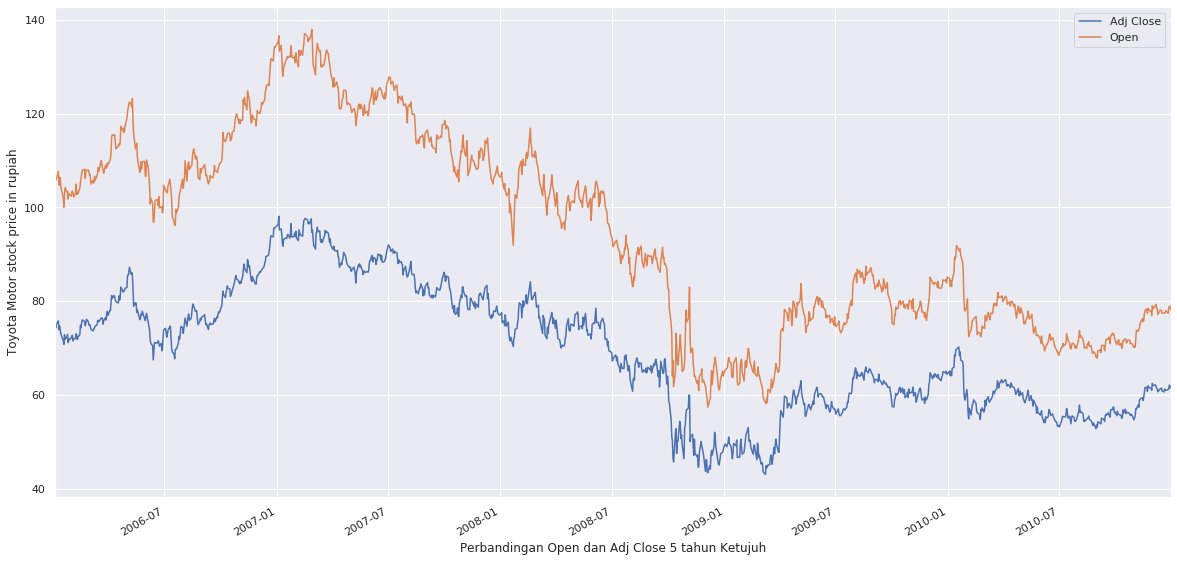

In [0]:
ax1 = fig.add_subplot(231)
ax1.set_title('2006')
ax1 = data2.loc['2006':'2010',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Toyota Motor stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 5 tahun Ketujuh');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


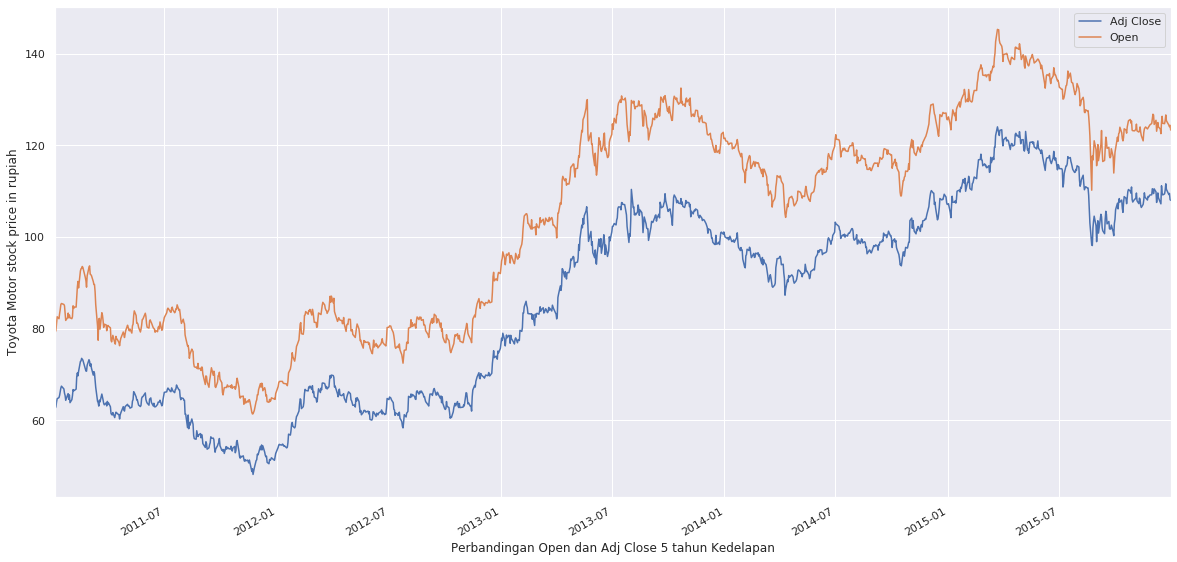

In [0]:
ax1 = fig.add_subplot(231)
ax1.set_title('2011')
ax1 = data2.loc['2011':'2015',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Toyota Motor stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 5 tahun Kedelapan');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


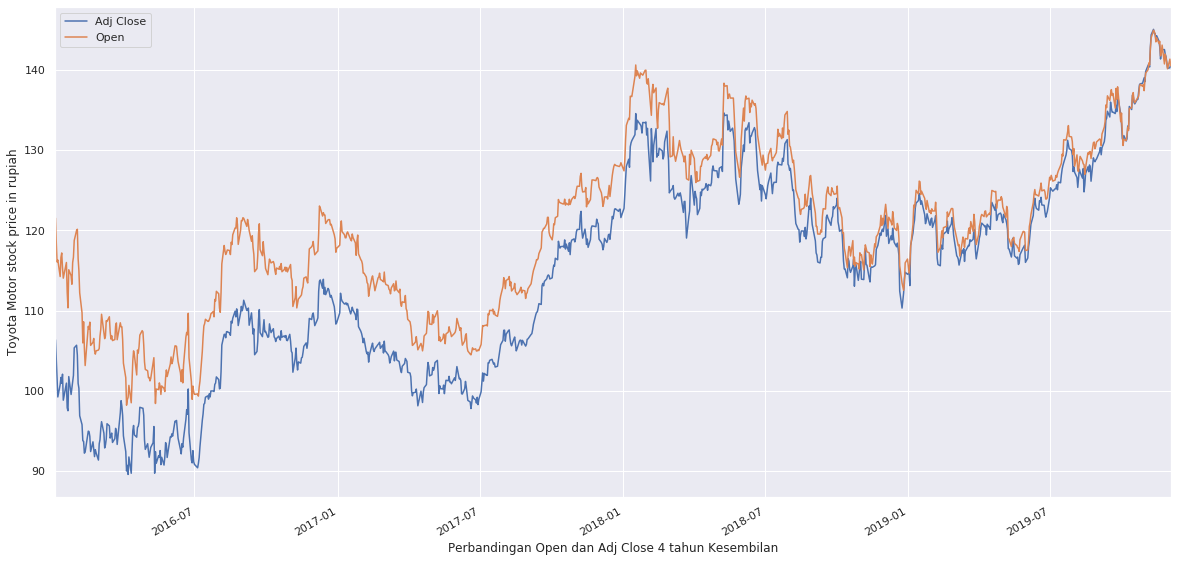

In [0]:
ax1 = fig.add_subplot(231)
ax1.set_title('2016')
ax1 = data2.loc['2016':'2019',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Toyota Motor stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 4 tahun Kesembilan');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


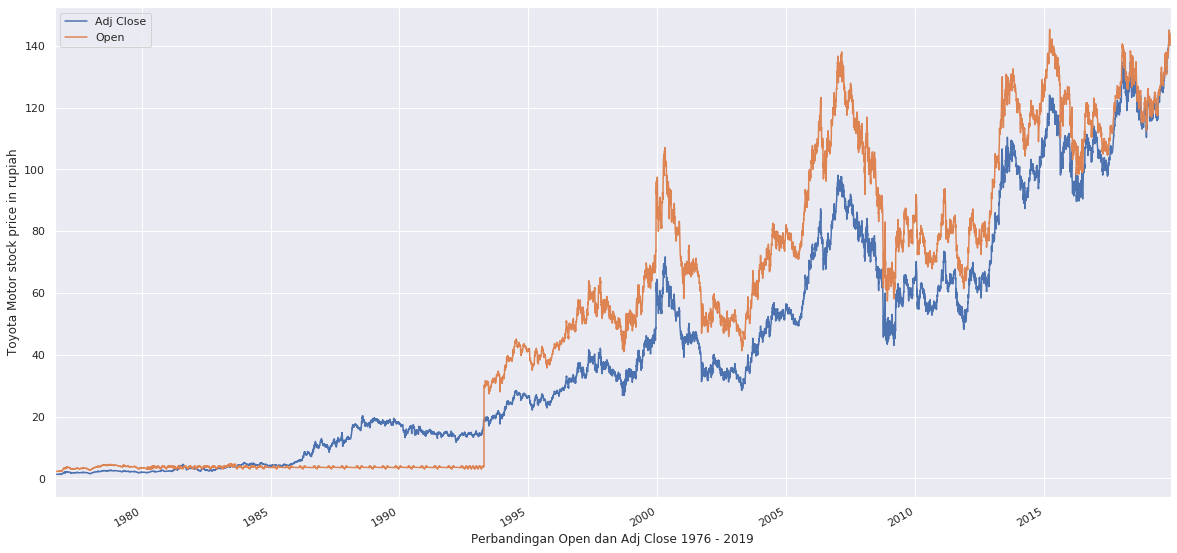

In [0]:
ax1 = fig.add_subplot(231)
ax1.set_title('1976')
ax1 = data2.loc['1976':'2019',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Toyota Motor stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 1976 - 2019');

In [0]:
des = data2.describe()

In [0]:
des

Open          High  ...     Adj Close        Volume
count  10919.000000  10919.000000  ...  10919.000000  1.091900e+04
mean      52.001978     55.983905  ...     42.572226  1.909232e+05
std       45.329773     42.134335  ...     37.251581  3.947180e+05
min        2.246658      2.246658  ...      1.307305  0.000000e+00
25%        3.750000     19.396189  ...     11.536744  8.150000e+03
50%       50.650002     51.000000  ...     33.586720  3.880000e+04
75%       85.285000     85.831249  ...     64.564942  2.533000e+05
max      145.330002    145.800003  ...    145.059998  1.858270e+07

[8 rows x 6 columns]

In [0]:
base_data = pd.read_csv('gdrive/My Drive/toyotavolume.csv')

In [0]:
print(base_data)

       Volume
0       19500
1         500
2        8000
3        1000
4        7500
...       ...
10914   86400
10915  179900
10916  107800
10917  117800
10918  109300

[10919 rows x 1 columns]


In [0]:
adj_close = data2['Adj Close']

In [0]:
time = np.linspace(1, len(adj_close), len(adj_close))

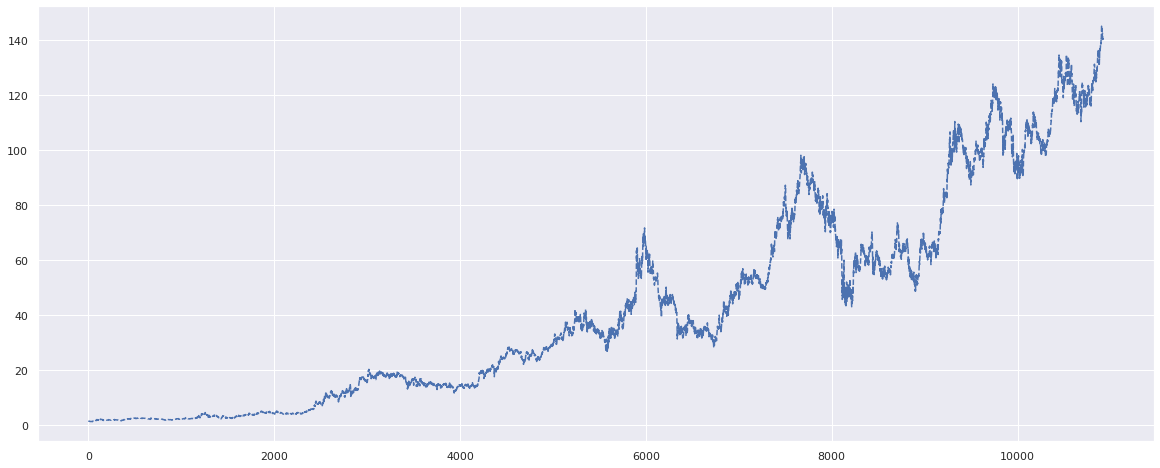

In [0]:
plt.plot(time, adj_close, label = '1976-2019', ls = '--')

In [0]:
print(data2)

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
1976-08-18    2.562200    2.562200    2.562200    2.562200    1.490914   19500
1976-08-19    2.549578    2.549578    2.549578    2.549578    1.483570     500
1976-08-20    2.536956    2.536956    2.536956    2.536956    1.476225    8000
1976-08-23    2.461226    2.461226    2.461226    2.461226    1.432159    1000
1976-08-24    2.435982    2.435982    2.435982    2.435982    1.417470    7500
...                ...         ...         ...         ...         ...     ...
2019-11-26  141.979996  142.000000  141.279999  141.970001  141.970001   86400
2019-11-27  141.490005  141.860001  141.009995  141.660004  141.660004  179900
2019-11-29  140.149994  140.580002  140.070007  140.210007  140.210007  107800
2019-12-02  141.350006  141.350006  139.699997  140.270004  140.270004  117800
2019-12-03  140.509995  140.789993  139.949997  140.

In [0]:
dataset = data2
print(dataset)

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
1976-08-18    2.562200    2.562200    2.562200    2.562200    1.490914   19500
1976-08-19    2.549578    2.549578    2.549578    2.549578    1.483570     500
1976-08-20    2.536956    2.536956    2.536956    2.536956    1.476225    8000
1976-08-23    2.461226    2.461226    2.461226    2.461226    1.432159    1000
1976-08-24    2.435982    2.435982    2.435982    2.435982    1.417470    7500
...                ...         ...         ...         ...         ...     ...
2019-11-26  141.979996  142.000000  141.279999  141.970001  141.970001   86400
2019-11-27  141.490005  141.860001  141.009995  141.660004  141.660004  179900
2019-11-29  140.149994  140.580002  140.070007  140.210007  140.210007  107800
2019-12-02  141.350006  141.350006  139.699997  140.270004  140.270004  117800
2019-12-03  140.509995  140.789993  139.949997  140.

In [0]:
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

In [0]:
#Test Separating Data By Class
dataset = [[2.5622,2.5622,0],
           [2.549578,2.54978,0],
           [2.536956,2.536956,0],
           [2.461226,2.461226,0],
           [2,435982,2.435982,0],
           [141.979996,142.000000,1],
           [141.860001,141.009995,1],
           [140.149994,140.580002,1],
           [141.350006,141350006,1],
           [140.50995,140.789993,1]]
separated = separate_by_class(dataset)
for label in separated:
	print(label)
	for row in separated[label]:
		print(row)

0
[2.5622, 2.5622, 0]
[2.549578, 2.54978, 0]
[2.536956, 2.536956, 0]
[2.461226, 2.461226, 0]
[2, 435982, 2.435982, 0]
1
[141.979996, 142.0, 1]
[141.860001, 141.009995, 1]
[140.149994, 140.580002, 1]
[141.350006, 141350006, 1]
[140.50995, 140.789993, 1]


In [0]:
def mean(numbers):
	return sum(numbers)/float(len(numbers))
 # Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

In [0]:
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries
summary = summarize_dataset(dataset)
print(summary)

[(71.7959907, 73.12879536310108, 10), (14178656.2490152, 44683667.593312286, 10)]


In [0]:
for label in summary:
	print(label)
	for row in summary:
		print(row)

(71.7959907, 73.12879536310108, 10)
(71.7959907, 73.12879536310108, 10)
(14178656.2490152, 44683667.593312286, 10)
(14178656.2490152, 44683667.593312286, 10)
(71.7959907, 73.12879536310108, 10)
(14178656.2490152, 44683667.593312286, 10)


In [0]:
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

In [0]:
print(calculate_probability(1.0, 52.00, 45.32))
print(calculate_probability(2.0, 52.00, 45.32))
print(calculate_probability(0.0, 52.00, 45.32))

0.00467338385113933
0.0047897142031016054
0.004557659312113383


1D Array filled with random values as per gaussian distribution : 
 [ 0.03495766 -0.02330165  0.02941886 ...  0.03821006  0.07828531
  0.08288941]


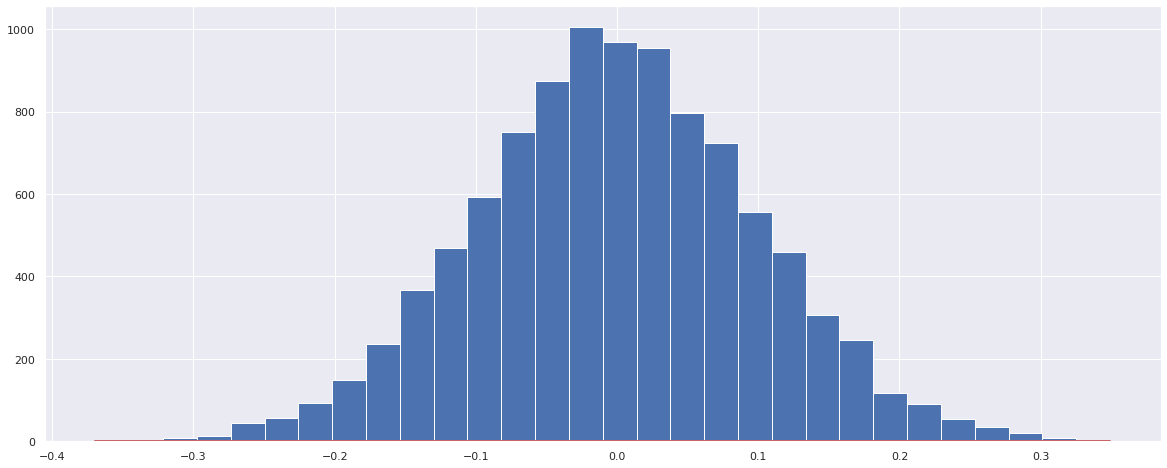

In [0]:
mean = 52.00
std = 45.32
array = geek.random.normal(0, 0.1, 10000) 
print("1D Array filled with random values "
      "as per gaussian distribution : \n", array); 
  
count, bins, ignored = plt.hist(array, 30, normed = None) 
plt.plot(bins, 1/(std * geek.sqrt(2 * geek.pi)) *
          geek.exp( - (bins - mean)**2 / (1 * std**2) ), 
          linewidth=2, color='r') 
plt.show() 
  

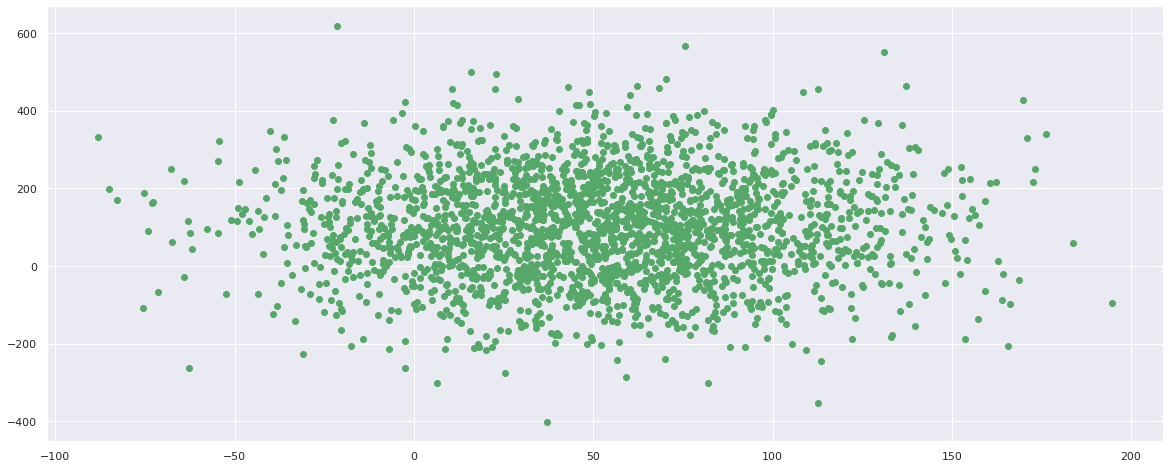

In [0]:
mu = 52 
sigma = 45
np.random.seed(0)
x = np.random.normal(mu,sigma, (52,45))
y = np.random.normal(mu * 2, sigma * 3, (52,45))
plt.scatter(x, y, color ='g')
plt.show()

In [0]:
base_data = "Close" 
data_p= 55.66
data2["Prediksi"] = np.where(
      data2[base_data] >= data_p,"Positive","Negative")

In [0]:
print(data2["Prediksi"])

Date
1976-08-18    Negative
1976-08-19    Negative
1976-08-20    Negative
1976-08-23    Negative
1976-08-24    Negative
                ...   
2019-11-26    Positive
2019-11-27    Positive
2019-11-29    Positive
2019-12-02    Positive
2019-12-03    Positive
Name: Prediksi, Length: 10919, dtype: object


In [0]:
base_data1 = "Adj Close" 
data_po= 42.57 
data2["Prediksi Harga Penutupan"] = np.where(
      data2[base_data1] >= data_po,"Positive","Negative")

In [0]:
print(data2["Prediksi Harga Penutupan"])

Date
1976-08-18    Negative
1976-08-19    Negative
1976-08-20    Negative
1976-08-23    Negative
1976-08-24    Negative
                ...   
2019-11-26    Positive
2019-11-27    Positive
2019-11-29    Positive
2019-12-02    Positive
2019-12-03    Positive
Name: Prediksi Harga Penutupan, Length: 10919, dtype: object


In [0]:
n_o_d = 3
variable_array= ["Open","High","Low"]
variable_array.append("Prediksi")
data2 = data2[variable_array].dropna(axis=0,how='any')

In [0]:
print(data2)

                  Open        High         Low  Prediksi
Date                                                    
1976-08-18    2.562200    2.562200    2.562200  Negative
1976-08-19    2.549578    2.549578    2.549578  Negative
1976-08-20    2.536956    2.536956    2.536956  Negative
1976-08-23    2.461226    2.461226    2.461226  Negative
1976-08-24    2.435982    2.435982    2.435982  Negative
...                ...         ...         ...       ...
2019-11-26  141.979996  142.000000  141.279999  Positive
2019-11-27  141.490005  141.860001  141.009995  Positive
2019-11-29  140.149994  140.580002  140.070007  Positive
2019-12-02  141.350006  141.350006  139.699997  Positive
2019-12-03  140.509995  140.789993  139.949997  Positive

[10919 rows x 4 columns]


In [0]:
train, test = train_test_split(data2, test_size=0.6, random_state=int(4))
gnb = GaussianNB()
newarr = []
newarr.extend(variable_array)
newarr.remove("Prediksi")

gnb.fit(train[newarr].values, train["Prediksi"])
result = gnb.predict(test[newarr])

In [0]:
print(result)

['Positive' 'Negative' 'Positive' ... 'Positive' 'Negative' 'Positive']


In [0]:
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          test.shape[0],
          (test["Prediksi"] != result).sum(),
          100*(1-(test["Prediksi"] != result).sum()/test.shape[0])
          ))

test_data = pd.concat([test[newarr], test["Prediksi"]], axis=1)
test_data["Prediksi"] = result
print (test_data)

Number of mislabeled points out of a total 6552 points : 69, performance 98.95%
                  Open        High         Low  Prediksi
Date                                                    
2013-07-12  129.220001  129.690002  129.070007  Positive
1985-05-15    3.614535    7.139153    7.049914  Negative
2010-09-23   70.910004   71.389999   70.699997  Positive
1982-11-17    3.500000    5.014406    4.929416  Negative
2007-11-28  110.550003  112.699997  110.389999  Positive
...                ...         ...         ...       ...
2007-06-01  122.180000  122.940002  122.019997  Positive
1991-06-05    3.480000   23.636364   23.409090  Negative
2000-05-31   92.500000   92.500000   91.187500  Positive
1986-02-20    3.890000    9.744945    9.557542  Negative
2010-01-04   84.750000   85.169998   84.709999  Positive

[6552 rows x 4 columns]


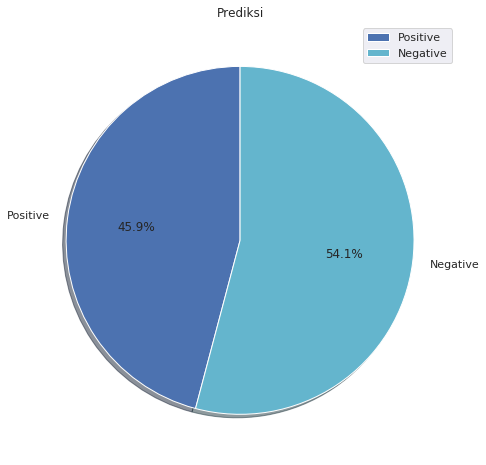

In [0]:
counts = ct(result)
count_p = counts['Positive']
count_n = counts['Negative']

slices = [count_p,count_n]
cols = ['b','c']
plt.pie(slices, labels=['Positive','Negative'],colors = cols,shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Prediksi")
plt.legend()
plt.show()